## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
#%matplotlib inline background 그래프 실행 및 결과 확인

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
#데이터 분항
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

sns.set()

plt.rc('font', family='Noto Sans CJK JP')
from statsmodels.api import Logit

import warnings
warnings.filterwarnings('ignore')

## 데이터 로드

In [3]:
df=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [4]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [5]:
df.describe(include='all')

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
count,1000,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000
unique,1000,1000,2,66,7,2,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4
top,PLT_1001,03JAN2023:07:07:53,양품,JS-SM490YB,영국,C,NaN,NaN,NaN,적용,...,NaN,NaN,NaN,NaN,NaN,NaN,CR(제어압연),NaN,NaN,2조
freq,1,1,690,84,256,755,NaN,NaN,NaN,953,...,NaN,NaN,NaN,NaN,NaN,NaN,840,NaN,NaN,292
mean,NaN,NaN,NaN,NaN,NaN,NaN,26.78200,2831.900000,36788.200000,NaN,...,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,NaN,934.637000,8.557000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,18.13757,494.081478,13912.387116,NaN,...,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,NaN,96.598015,1.604158,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,1800.000000,7900.000000,NaN,...,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,NaN,0.000000,5.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,15.00000,2500.000000,26650.000000,NaN,...,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,NaN,893.750000,8.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,19.00000,2800.000000,40400.000000,NaN,...,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,NaN,948.000000,9.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,34.00000,3100.000000,49100.000000,NaN,...,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,NaN,991.000000,10.000000,NaN


## 결측치 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

> 결측치가 없다.

[결측치 및 데이터 확인결과]
- 전체 데이터수는 720개이다.
- 결측치가 존재하지 않는다.
- 목표변수는 scale(이산형: 0과1) , 설명변수(연속형, 20개)
- 문자형 변수를 더미변수로 바꿔주어야 함.(이산형 처리를 위함)
- 탐색적 분석 이후에 더미화 해주기(더미화 해주면 탐색적 분석을 할 수가 없기 때문)
- plate no는 scale 불량과 전혀 상관이 없음 ->  drop
- FUR_SZ_TEMP와 FUR_EXTEMP는 값이 같음. -> 확인 후 둘중 한개 drop
- 총 세개의 재로시간 존재, 각 재로시간의 분포는 동일한가? -> 확인 후 drop
- Rolling date와 불량률은 관계가 있을까? -> 확인 후 drop 여부 결정


### 이상치 제거

In [7]:
df['rolling_temp'].sort_values()

221       0
53        0
599       0
600       0
222       0
       ... 
188    1066
191    1068
715    1071
716    1071
187    1078
Name: rolling_temp, Length: 1000, dtype: int64

> rolling_temp, 압연 온도가 0인 데이터가 있다. 이는 철이 녹는 온도가 아니므로 이상치로 예상된다.
- 압연 온도를 평균치로 대체하기에는 무리가 있으므로, 이상치로 판단하고 6행을 제거한다.

In [8]:
df = df[~df['rolling_temp'].eq(0)]

In [9]:
df.shape

(994, 22)

### 동일 값 컬럼 제거

In [10]:
(df['fur_soak_temp'] == df['fur_ex_temp']).value_counts()

True    994
dtype: int64

> df['fur_soak_temp']와 df['fur_ex_temp']는 서로 같은 컬럼이다. 따라서 하나의 컬럼을 드롭한다.

In [11]:
df.drop('fur_soak_temp',axis=1, inplace=True)

### 각 변수별 유니크값 확인

In [12]:
df['scale'].unique()

array(['양품', '불량'], dtype=object)

In [13]:
df['rolling_method'].unique()

array(['TMCP(온도제어)', 'CR(제어압연)'], dtype=object)

In [14]:
df['work_group'].unique()

array(['1조', '2조', '3조', '4조'], dtype=object)

In [15]:
df['fur_no'].unique()

array(['1호기', '2호기', '3호기'], dtype=object)

In [16]:
df['fur_input_row'].unique()

array(['1열', '2열'], dtype=object)

In [17]:
df["spec_long"].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

In [18]:
df['spec_country'].unique()

array(['미국', '영국', '프랑스', '공통', '독일', '한국', '일본'], dtype=object)

### 상관분석

Correlation


,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
pt_thick,1.000000,-0.320606,-0.866691,-0.522101,0.205822,0.363622,0.343731,-0.663015,-0.450942,-0.845154
pt_width,-0.320606,1.000000,0.148769,0.201312,-0.103698,-0.101242,-0.137791,0.218066,-0.155038,0.353954
pt_length,-0.866691,0.148769,1.000000,0.466737,-0.135821,-0.336363,-0.278400,0.599513,0.366254,0.816850
fur_heat_temp,-0.522101,0.201312,0.466737,1.000000,-0.161504,-0.375056,-0.314602,0.785440,0.341403,0.483688
fur_heat_time,0.205822,-0.103698,-0.135821,-0.161504,1.000000,0.114218,0.736399,-0.347486,-0.131929,-0.163866
fur_soak_time,0.363622,-0.101242,-0.336363,-0.375056,0.114218,1.000000,0.632780,-0.601144,-0.486545,-0.402145
fur_total_time,0.343731,-0.137791,-0.278400,-0.314602,0.736399,0.632780,1.000000,-0.564089,-0.345276,-0.340797
fur_ex_temp,-0.663015,0.218066,0.599513,0.785440,-0.347486,-0.601144,-0.564089,1.000000,0.628510,0.623454
rolling_temp,-0.450942,-0.155038,0.366254,0.341403,-0.131929,-0.486545,-0.345276,0.628510,1.000000,0.313695
descaling_count,-0.845154,0.353954,0.816850,0.483688,-0.163866,-0.402145,-0.340797,0.623454,0.313695,1.000000


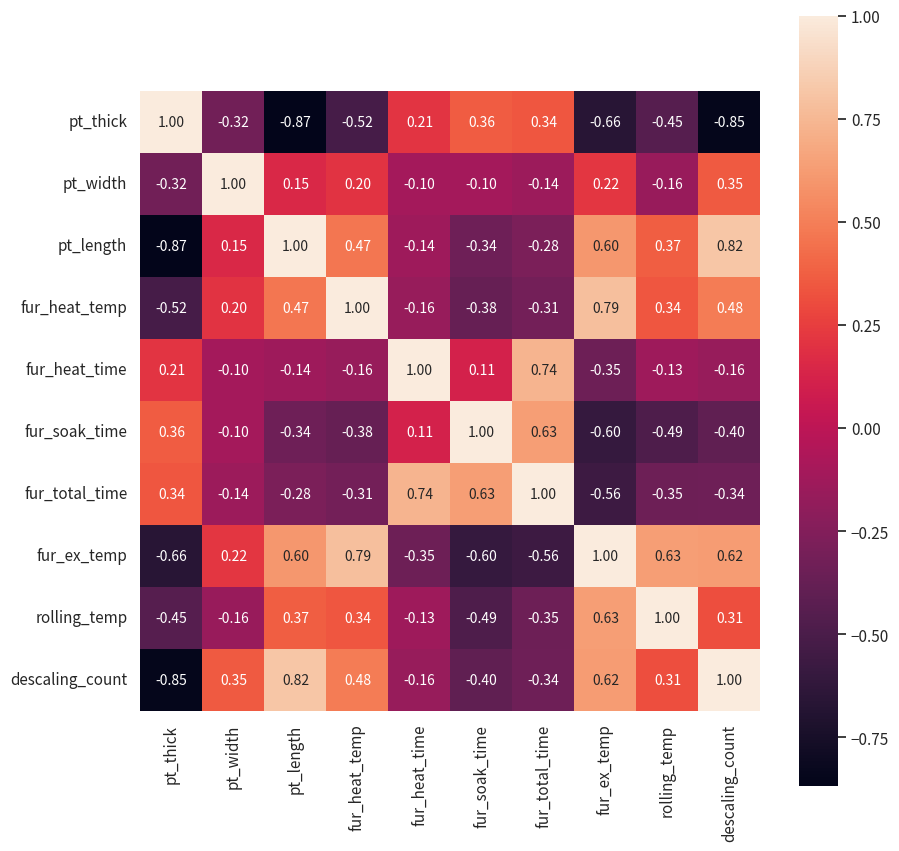

In [19]:
#상관분석
df_numeric = df.select_dtypes(include=np.number)
df_numeric = pd.concat([df_numeric,df[['scale']]], axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(df_numeric.corr(), annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

corr_matrix = df_numeric.corr()
print('Correlation')
corr_matrix

### spec_long과 spec_country의 관계

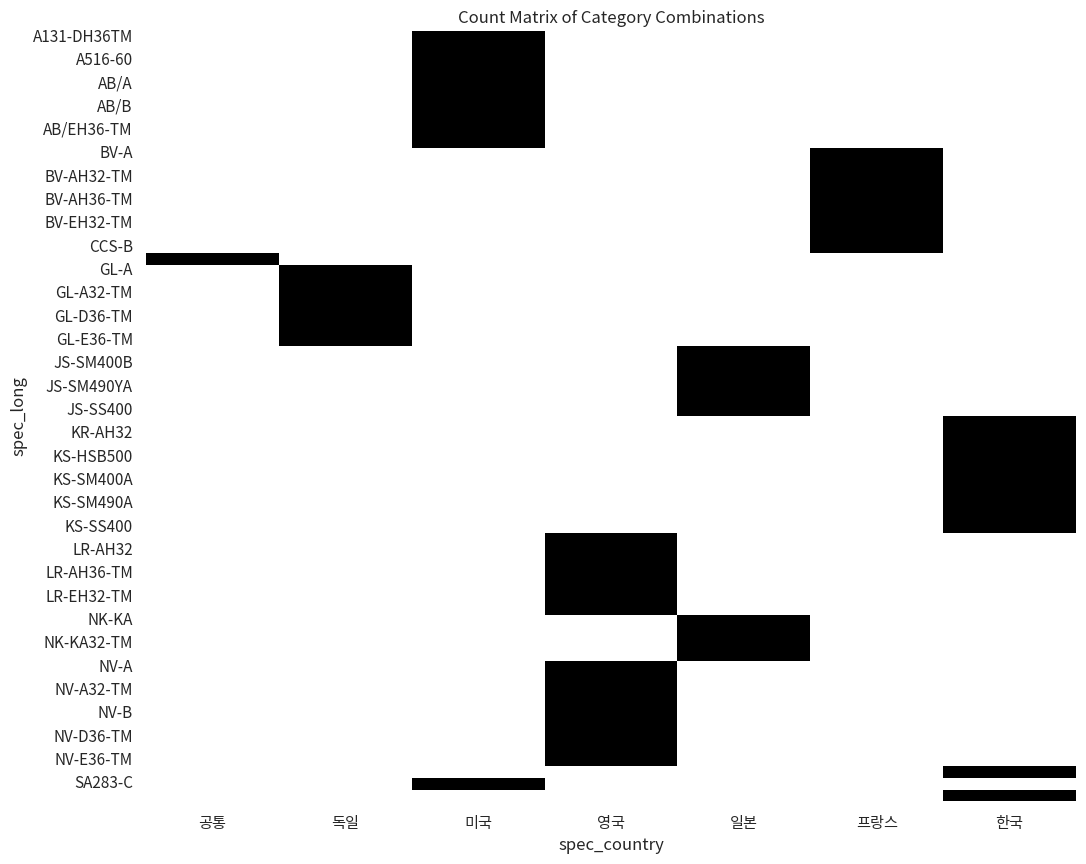

In [20]:
# 값 조합에 대한 개수를 세기 위해 crosstab 함수 사용
cross_tab = pd.crosstab(df['spec_long'], df['spec_country'])
cross_tab[cross_tab > 0] = 30

# Heatmap으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cross_tab, annot=False, fmt='d', cbar=False,
            cmap='binary',  # 색상 맵 설정
            annot_kws={"size": 8, "weight": "normal"})  # 숫자 크기 조절
plt.title('Count Matrix of Category Combinations')
plt.show()

> 국가별로 spec_long 변수가 겹치지 않으므로, spec_long 컬럼은 drop하고 spec_country 컬럼 하나로만 사용하기로 한다.

### 가설검정

> 카이제곱 독립성검정

In [21]:
# 카이제곱 검정
from scipy import stats
categorical_var = ['steel_kind', 'hsb', 'fur_no', 'work_group', 'descaling_count']

for var in categorical_var:
    contingency_table = pd.crosstab(df[var], df['scale'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"Variable: {var}")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("\n")

Variable: steel_kind
Chi-square statistic: 76.25774182995244
P-value: 2.489547428454086e-18


Variable: hsb
Chi-square statistic: 105.51048606504317
P-value: 9.439705302426995e-25


Variable: fur_no
Chi-square statistic: 3.1186222255276252
P-value: 0.2102808811312071


Variable: work_group
Chi-square statistic: 13.90057724000546
P-value: 0.003043655675169399


Variable: descaling_count
Chi-square statistic: 213.43807784438695
P-value: 3.7785639765631377e-44




> t 검정

In [22]:
# 각 그룹의 데이터 추출
group_0_fur_heat_temp = df[df['scale'] == '양품']['fur_heat_temp']
group_1_fur_heat_temp = df[df['scale'] == '불량']['fur_heat_temp']

# 등분산성 검정
levene_test = stats.levene(group_0_fur_heat_temp, group_1_fur_heat_temp)
equal_var = levene_test.pvalue > 0.05  # 등분산성 만족 여부

# t-검정 수행
if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_heat_temp, group_1_fur_heat_temp)
    test_type = "equal-variance t-test"
else:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_heat_temp, group_1_fur_heat_temp, equal_var=False)
    test_type = "Welch's t-test"

# 결과 출력
print("Test Type:", test_type)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 유의수준 설정
alpha = 0.05
print('귀무가설: 양품과 불량품의 fur_heat_temp의 평균은 같다.')
# 결론 도출
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 모집단의 평균은 같습니다.")

Test Type: Welch's t-test
T-Statistic: -7.370321732059489
P-Value: 5.196967107865645e-13
귀무가설: 양품과 불량품의 fur_heat_temp의 평균은 같다.
귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.


In [23]:
# 각 그룹의 데이터 추출
group_0_rolling_temp = df[df['scale'] == '양품']['rolling_temp']
group_1_rolling_temp = df[df['scale'] == '불량']['rolling_temp']

# 등분산성 검정
levene_test = stats.levene(group_0_fur_heat_temp, group_1_fur_heat_temp)
equal_var = levene_test.pvalue > 0.05  # 등분산성 만족 여부

# t-검정 수행
if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_heat_temp, group_1_fur_heat_temp)
    test_type = "equal-variance t-test"
else:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_heat_temp, group_1_fur_heat_temp, equal_var=False)
    test_type = "Welch's t-test"

# 결과 출력
print("Test Type:", test_type)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 유의수준 설정
alpha = 0.05

print('귀무가설: 양품과 불량품의 rolling_temp의 평균은 같다.')

# 결론 도출
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 모집단의 평균은 같습니다.")

Test Type: Welch's t-test
T-Statistic: -7.370321732059489
P-Value: 5.196967107865645e-13
귀무가설: 양품과 불량품의 rolling_temp의 평균은 같다.
귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.


In [24]:
# 각 그룹의 데이터 추출
group_0_fur_ex_temp = df[df['scale'] == '양품']['fur_ex_temp']
group_1_fur_ex_temp = df[df['scale'] == '불량']['fur_ex_temp']

# 등분산성 검정
levene_test = stats.levene(group_0_fur_ex_temp, group_1_fur_ex_temp)
equal_var = levene_test.pvalue > 0.05  # 등분산성 만족 여부

# t-검정 수행
if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_ex_temp, group_1_fur_ex_temp)
    test_type = "equal-variance t-test"
else:
    t_statistic, p_value = stats.ttest_ind(group_0_fur_ex_temp, group_1_fur_ex_temp, equal_var=False)
    test_type = "Welch's t-test"

# 결과 출력
print("Test Type:", test_type)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 유의수준 설정
alpha = 0.05

print('귀무가설: 양품과 불량품의 fur_ex_temp의 평균은 같다.')

# 결론 도출
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 모집단의 평균은 같습니다.")

Test Type: Welch's t-test
T-Statistic: -12.038071527451592
P-Value: 1.0795022289842146e-30
귀무가설: 양품과 불량품의 fur_ex_temp의 평균은 같다.
귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.


In [25]:
import pandas as pd
from scipy import stats

# 각 그룹의 데이터 추출
group_0_pt_thick = df[df['scale'] == '양품']['pt_thick']
group_1_pt_thick = df[df['scale'] == '불량']['pt_thick']

# 등분산성 검정
levene_test = stats.levene(group_0_pt_thick, group_1_pt_thick)
equal_var = levene_test.pvalue > 0.05  # 등분산성 만족 여부

# t-검정 수행
if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_0_pt_thick, group_1_pt_thick)
    test_type = "equal-variance t-test"
else:
    t_statistic, p_value = stats.ttest_ind(group_0_pt_thick, group_1_pt_thick, equal_var=False)
    test_type = "Welch's t-test"

# 결과 출력
print("Test Type:", test_type)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# 유의수준 설정
alpha = 0.05

print('귀무가설: 양품과 불량품의 pt_thick의 평균은 같다.')

# 결론 도출
if p_value < alpha:
    print("귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.")
else:
    print("귀무가설을 채택합니다. 두 모집단의 평균은 같습니다.")

Test Type: Welch's t-test
T-Statistic: 3.426083985751171
P-Value: 0.0006420832492939931
귀무가설: 양품과 불량품의 pt_thick의 평균은 같다.
귀무가설을 기각합니다. 두 모집단의 평균은 다릅니다.


가열로 가열대 온도, 가열로 추출온도, 사상압연 온도, 판두께는 등분산성을 만족하지 않아 웰치의 t검정 해보았는데 다 귀무가설 기각해서 불량인 평균과 양품인 평균이 다르다는 결론이 나왔다.

In [26]:
from scipy.stats import chi2_contingency

# 범주형 변수 선택
categorical_variables = ['hsb', 'descaling_count']

# 각 변수와 scale 간의 독립성을 평가하는 카이제곱 검정 수행
for var in categorical_variables:
    contingency_table = pd.crosstab(df[var], df['scale'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f'Chi-square test for {var}:')
    print('Chi-square statistic:', chi2)
    print('p-value:', p_value)
    print()

Chi-square test for hsb:
Chi-square statistic: 105.51048606504317
p-value: 9.439705302426995e-25

Chi-square test for descaling_count:
Chi-square statistic: 213.43807784438695
p-value: 3.7785639765631377e-44



Hot Scale Braker 작동 여부, 압연 Descaling 횟수는 카이제곱 검정했는데, 다 귀무가설을 기각해서 scale과 각 변수는 독립이 아니라는 결론이 나왔다.

### 범주형 변수와 목표변수의 관계

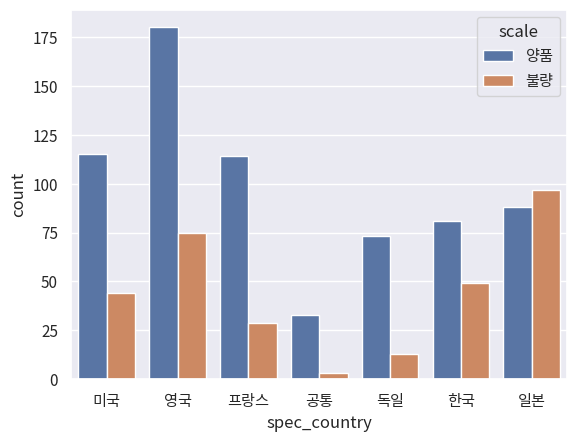

In [27]:
sns.countplot(x='spec_country', hue='scale', data=df)
plt.show()

> 특별한 비율 차이는 없어보인다.
> 그러나 일본만이 불량품의 개수가 더 많은 것을 확인할 수 있다.
- 조사 결과(https://www.snmnews.com/news/articleView.html?idxno=279887), JIS(일본규격)기준으로는 양품인 제품들이 우리나라 규격 기준으로 봤을 때는 불량이라고 한다. 즉, 우리나라의 불량 기준이 더 높은 것 때문에 이러한 결과가 나왔다고 유추해볼 수 있다.

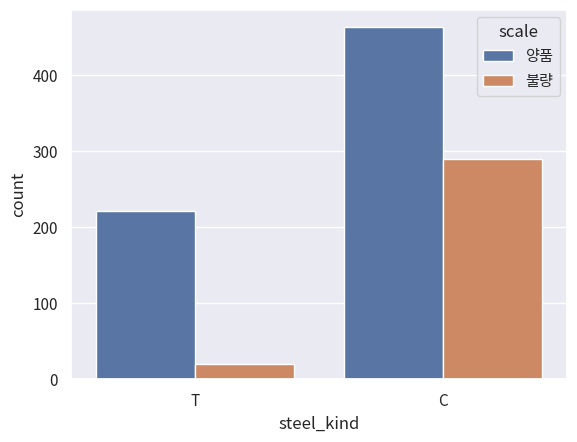

In [28]:
# 강종에 따른 불량 개수
sns.countplot(x='steel_kind',hue='scale', data=df)
plt.show()

>  T는 티타늄, C는 탄소강이다. C에서 더 불량이 많은 것을 알 수 있다.

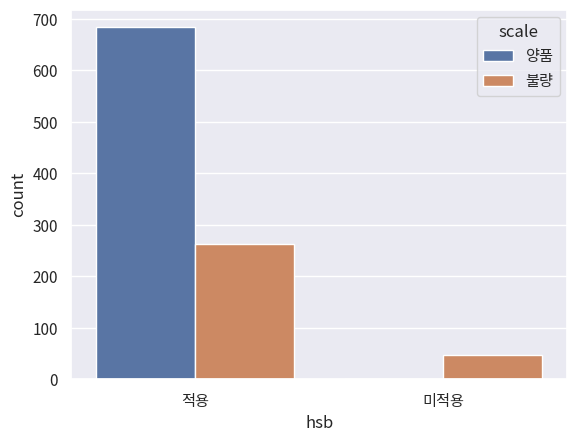

In [29]:
# hsb에 따른 불량 개수
sns.countplot(x='hsb', hue='scale', data=df)
plt.show()

>  hsb 미적용 시에는 양품이 하나도 나오지 않았다.

<Axes: xlabel='fur_no', ylabel='count'>

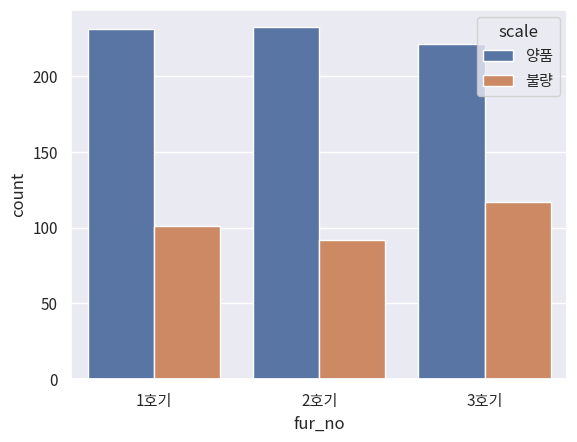

In [30]:
# 호기에 따른 불량 개수
sns.countplot(x='fur_no', hue='scale', data=df)

> 가열로 호기에 따른 불량률 차이는 없는 것으로 보인다.

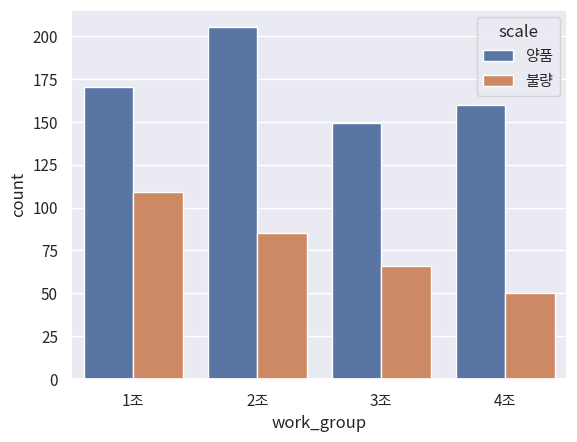

In [31]:
# 작업 조에 따른 불량 개수
sns.countplot(x='work_group', hue='scale', data=df)
plt.show()

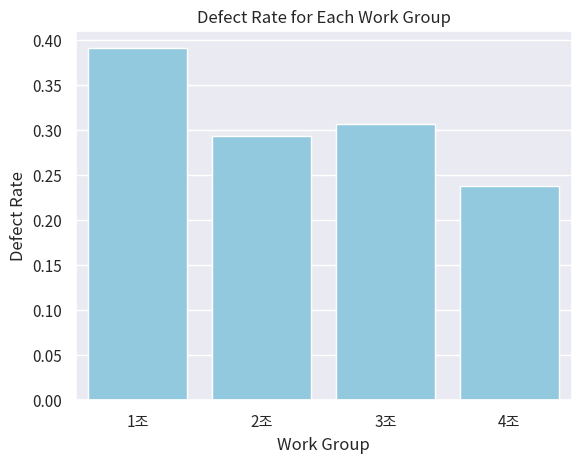

In [32]:
grouped_data = df.groupby(['work_group', 'scale'])['scale'].count().reset_index(name='count')

# Pivot the data to get 'scale' as columns and calculate the total count for each 'work_group'
pivot_data = grouped_data.pivot(index='work_group', columns='scale', values='count').reset_index()

# Calculate the defect rate (불량률) for each work group
pivot_data['defect_rate'] = pivot_data['불량'] / (pivot_data['양품'] + pivot_data['불량'])

# Create a bar plot to visualize the defect rate for each work group
sns.barplot(x='work_group', y='defect_rate', data=pivot_data, color='skyblue')

# Add labels and title
plt.xlabel('Work Group')
plt.ylabel('Defect Rate')
plt.title('Defect Rate for Each Work Group')

# Show the plot
plt.show()

> 1, 3, 2, 4조 순으로 불량률이 낮다.

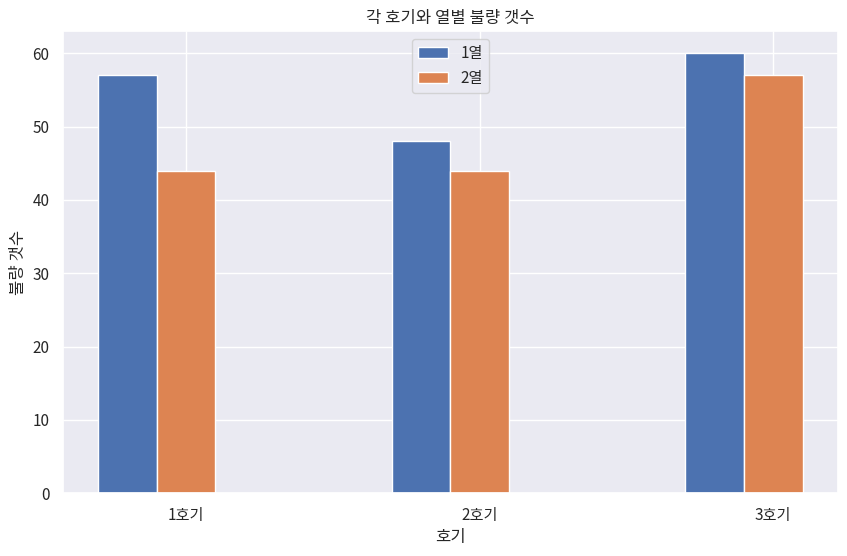

In [33]:
# 호기별 열별 불량 개수
defect_counts = np.array([
    [57, 44],
    [48, 44],
    [60, 57]
])
fur_nos = ['1호기', '2호기', '3호기']
fur_input_rows = ['1열', '2열']

# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 각 막대의 너비와 위치 설정
bar_width = 0.2
x_positions = np.arange(len(fur_nos))

# 각 호기와 열별로 막대 그래프 생성
for i, row_label in enumerate(fur_input_rows):
    ax.bar(x_positions + (i - 1) * bar_width, defect_counts[:, i], width=bar_width, label=row_label)

# x축 레이블과 위치 설정
ax.set_xticks(x_positions)
ax.set_xticklabels(fur_nos)
ax.set_xlabel('호기')
ax.set_ylabel('불량 갯수')

# 범례 추가
ax.legend()

# 그래프 제목
plt.title('각 호기와 열별 불량 갯수')

# 그래프 보여주기
plt.show()

> 호기와 열별 불량갯수

### 연속형 변수와 목표변수의 관계

<Figure size 1000x1000 with 0 Axes>

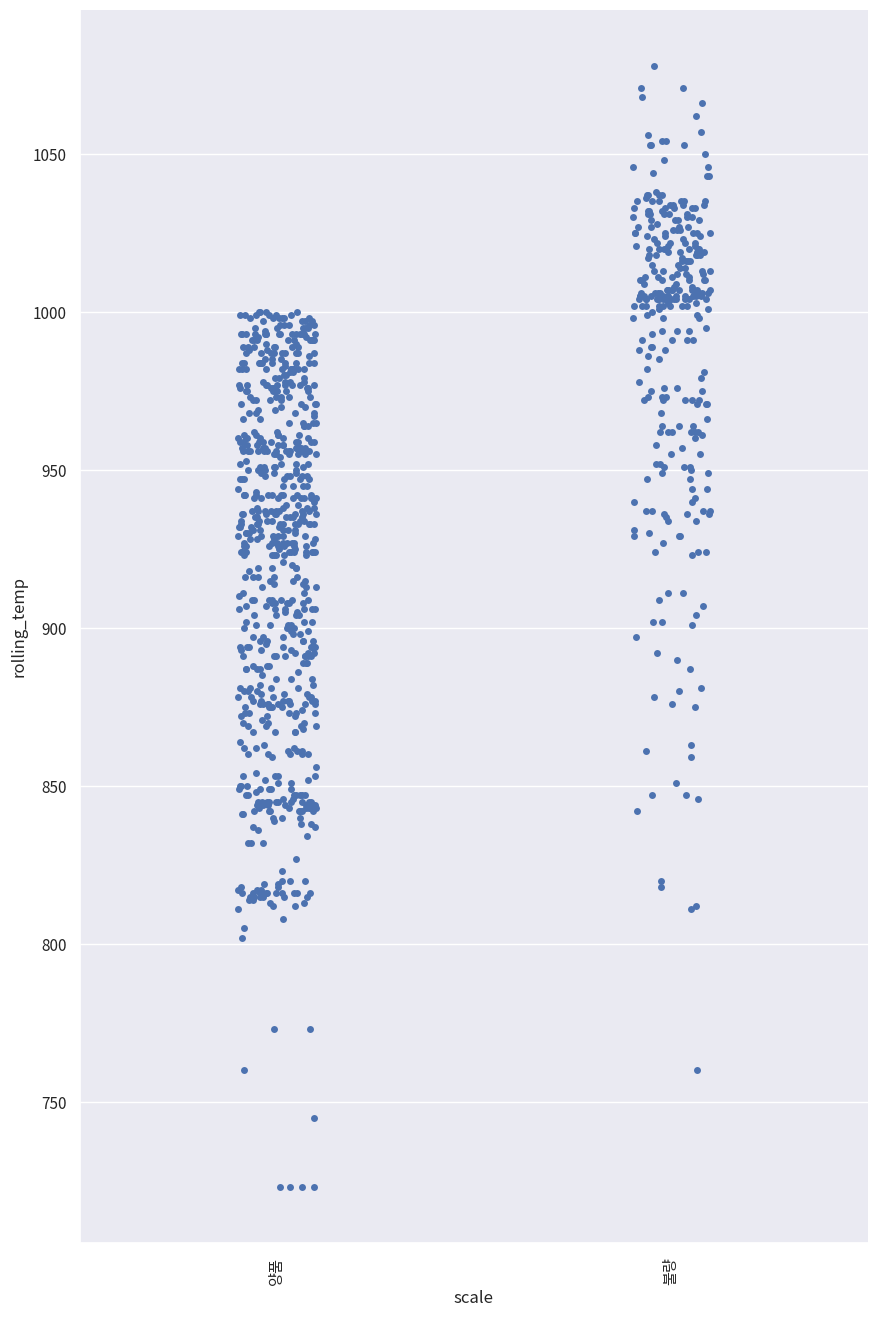

In [34]:
# scale vs rolling_temp 
plt.figure(figsize=(10,10))
fig = sns.catplot(x='scale', y='rolling_temp', data=df)
fig.fig.set_size_inches(10,15)
plt.xticks(rotation=90)
plt.show()

>  rolling_temp온도가 1000도를 넘어가면 양품이 나오지 않는다.

<Figure size 1000x1000 with 0 Axes>

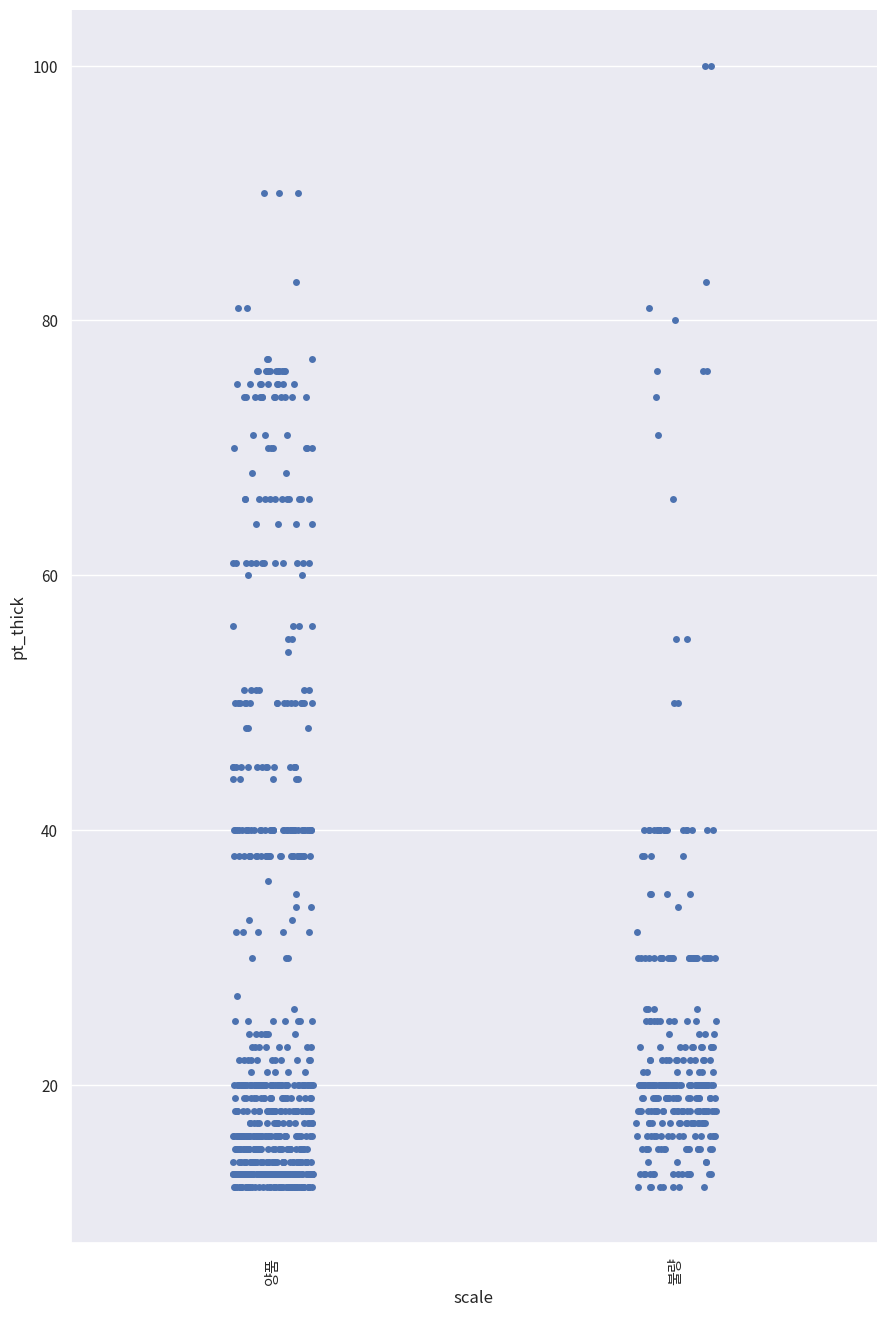

In [35]:
plt.figure(figsize=(10,10))
fig = sns.catplot(x='scale', y='pt_thick', data=df)
fig.fig.set_size_inches(10,15)
plt.xticks(rotation=90)
plt.show()

> pt_thick가 클 때 양품이 나오는 경우가 눈에 띄게 많다.

<Figure size 1000x1000 with 0 Axes>

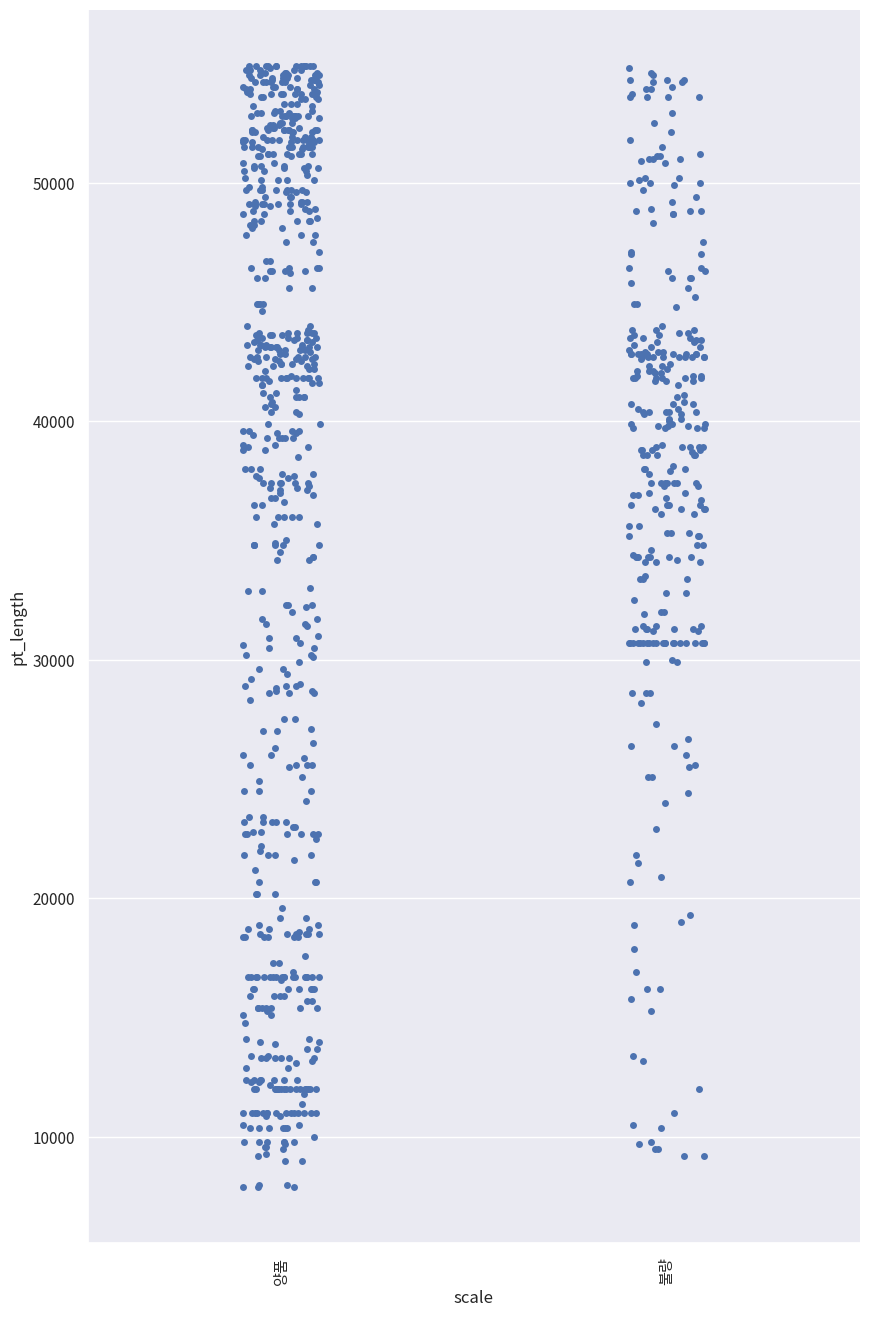

In [36]:
plt.figure(figsize=(10,10))
fig = sns.catplot(x='scale', y='pt_length', data=df)
fig.fig.set_size_inches(10,15)
plt.xticks(rotation=90)
plt.show()

> pt_length가 45000을 넘을 때 양품이 나올 경우가 많다.

<Figure size 1000x1000 with 0 Axes>

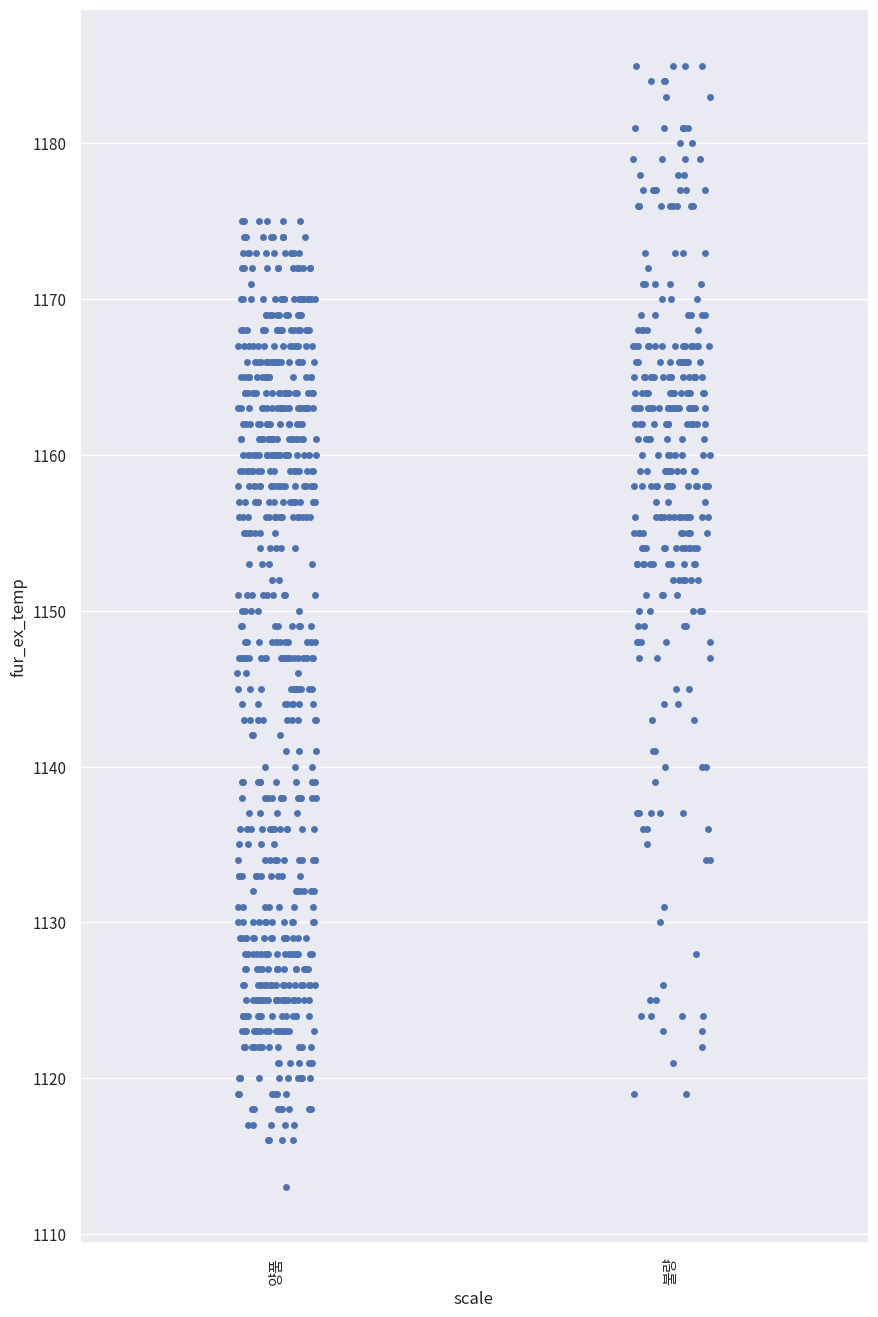

In [37]:
plt.figure(figsize=(10,10))
fig = sns.catplot(x='scale', y='fur_ex_temp', data=df)
fig.fig.set_size_inches(10,15)
plt.xticks(rotation=90)
plt.show()

> fur_ex_temp가 1175가 넘을 때 양품이 거의 발생하지 않는다.

<Figure size 1000x1000 with 0 Axes>

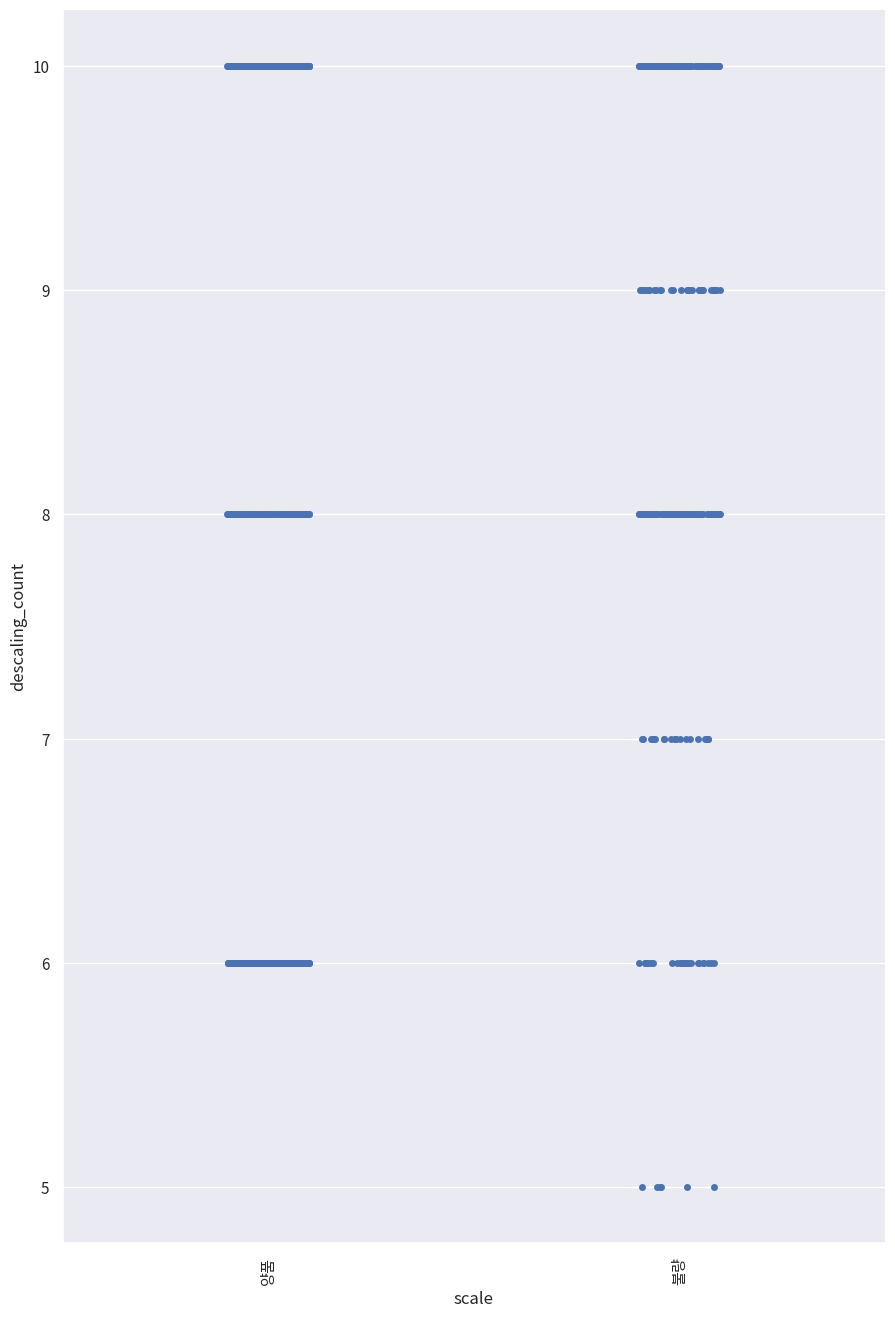

In [38]:
plt.figure(figsize=(10,10))
fig = sns.catplot(x='scale', y='descaling_count', data=df)
fig.fig.set_size_inches(10,15)
plt.xticks(rotation=90)
plt.show()

> 특이하게 홀수번 descaling을 하면 불량이 발생한다.. (고찰로 넣을까 고민)

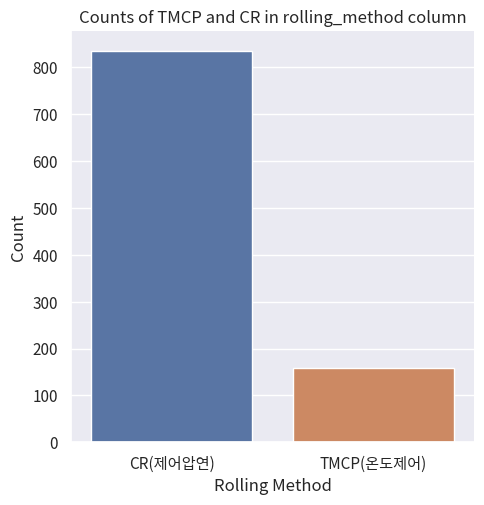

In [39]:
# 'TMCP'와 'CR'의 카운트를 세기
counts = df['rolling_method'].value_counts().reset_index()
counts.columns = ['rolling_method', 'count']

# catplot으로 시각화
sns.catplot(x='rolling_method', y='count', kind='bar', data=counts)
plt.xlabel('Rolling Method')
plt.ylabel('Count')
plt.title('Counts of TMCP and CR in rolling_method column')
plt.show()

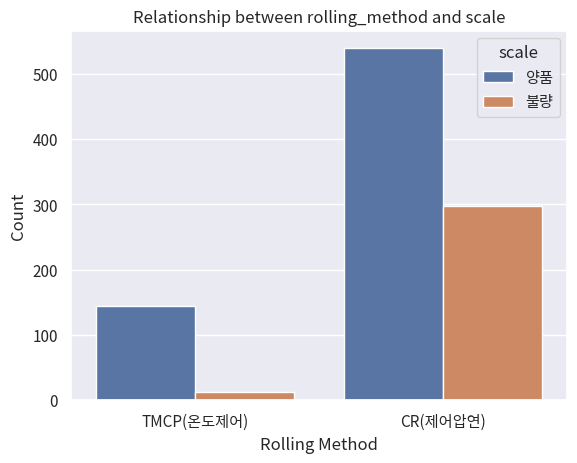

In [40]:
sns.countplot(x='rolling_method', hue='scale', data=df)
plt.xlabel('Rolling Method')
plt.ylabel('Count')
plt.title('Relationship between rolling_method and scale')
plt.show()

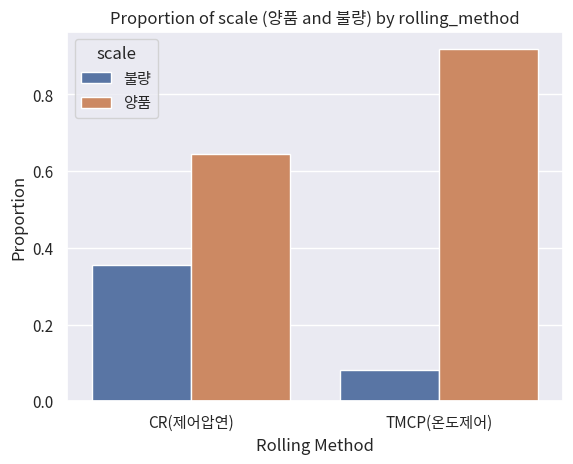

In [41]:
# 'rolling_method'와 'scale' 사이의 관계를 보여주는 그래프 그리기 (비율로 나타내기)
prop_df = df.groupby(['rolling_method', 'scale']).size() / df.groupby('rolling_method').size()
prop_df = prop_df.reset_index(name='proportion')

sns.barplot(x='rolling_method', y='proportion', hue='scale', data=prop_df)
plt.xlabel('Rolling Method')
plt.ylabel('Proportion')
plt.title('Proportion of scale (양품 and 불량) by rolling_method')
plt.show()

> TMCP와 CR에 따른 불량, 양품 count그래프와 비율그래프를 나타냈다.

### rolling_date 컬럼과 불량률과의 관계 확인

In [42]:
import datetime
import time

In [43]:
df['rolling_date'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df['rolling_hour'] = df['rolling_date'].dt.hour
df['rolling_day'] = df['rolling_date'].dt.day
df['rolling_weekday'] = df['rolling_date'].dt.weekday


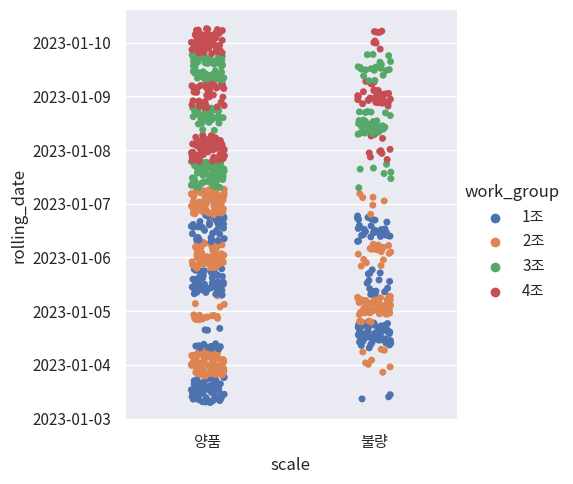

In [44]:
sns.catplot(x='scale', y='rolling_date', data=df, hue='work_group')
plt.show()

> 1월 5일에 특히 불량품이 많아보인다.

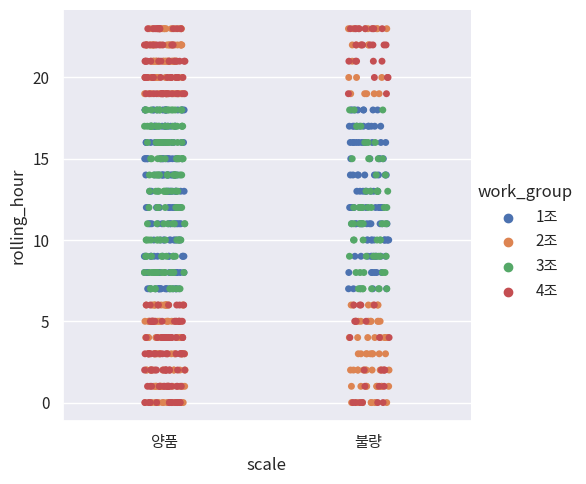

In [45]:
sns.catplot(x='scale',y='rolling_hour',data=df, hue='work_group')
plt.show()

> 시간대별 불량률에는 큰 차이가 없어보인다.

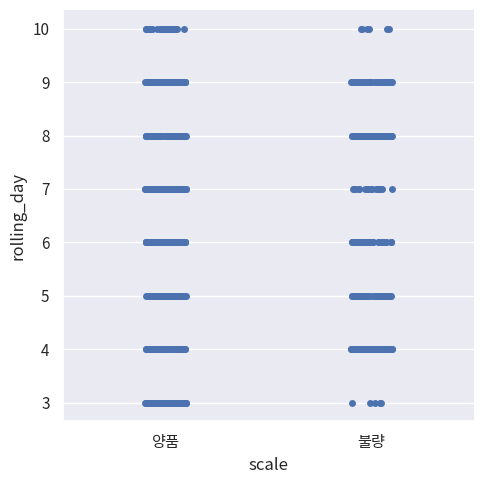

In [46]:
sns.catplot(x='scale',y='rolling_day', data=df)

> 요일별 불량률에는 큰 차이가 없어보인다.

> **날짜, 시간, 요일과 불량률은 큰 관계가 없어보이고, 다른 요인이 영향을 미치는 것으로 보인다.
- 위에서 각 작업조별 불량률과 나라 규격별 불량률에 차이가 있는 것으로 나타났다.
- 해당 컬럼을 기준으로 본다.

In [47]:
df[['work_group','rolling_date','rolling_hour']].sort_values(by=['work_group','rolling_date']).head(10)

,work_group,rolling_date,rolling_hour
0,1조,2023-01-03 07:07:53,7
1,1조,2023-01-03 07:21:22,7
2,1조,2023-01-03 07:31:15,7
3,1조,2023-01-03 07:41:01,7
4,1조,2023-01-03 07:52:40,7
5,1조,2023-01-03 08:01:55,8
6,1조,2023-01-03 08:14:02,8
7,1조,2023-01-03 08:24:12,8
8,1조,2023-01-03 08:38:23,8
9,1조,2023-01-03 08:45:58,8


> 데이터를 sort해서 살펴보니 각 작업조는 2교대이며, 시간대는 07~18, 19~06 기준인것으로 보인다.

In [48]:
print('07-18: ',len(df[df['work_group'].eq('1조')|df['work_group'].eq('3조')]))
print('19-06: ',len(df[df['work_group'].eq('2조')|df['work_group'].eq('4조')]))

07-18:  494
19-06:  500


> 각 시간대별 생산량은 차이가 없다는 것을 확인했다.

In [49]:
df['rolling_weekday'].value_counts()

4    147
2    145
6    143
0    143
5    141
1    138
3    137
Name: rolling_weekday, dtype: int64

> 요일별 생산량에도 큰 차이가 없는 것을 확인했다.

In [50]:
df.groupby(['rolling_weekday','scale']).size().to_frame()

0
rolling_weekday scale     
0               불량      38
                양품     105
1               불량      11
                양품     127
2               불량      80
                양품      65
3               불량      59
                양품      78
4               불량      46
                양품     101
5               불량      17
                양품     124
6               불량      59
                양품      84

> 2(수요일)에 불량품 생산량이 양품 생산량보다 더 많은 것을 확인했다.

In [51]:
df.groupby(['rolling_weekday','spec_country','scale']).size().to_frame()

0
rolling_weekday spec_country scale    
0               독일           양품     16
                미국           불량     11
                             양품     21
                영국           불량     13
                             양품     35
...                                 ..
6               일본           양품      5
                프랑스          불량      7
                             양품      9
                한국           불량     14
                             양품      8

[87 rows x 1 columns]

In [52]:
df.loc[df['rolling_day'].eq(2)]['spec_country'].value_counts()

Series([], Name: spec_country, dtype: int64)

> 수요일에 일본 규격 생산량이 특히 많은 것을 확인할 수 있다.

In [53]:
df.groupby(['work_group','rolling_day','scale']).size().to_frame()

0
work_group rolling_day scale    
1조         3           불량      3
                       양품     64
           4           불량     60
                       양품     14
           5           불량     15
                       양품     51
           6           불량     31
                       양품     41
2조         3           불량      2
                       양품     30
           4           불량     20
                       양품     51
           5           불량     44
                       양품     27
           6           불량     15
                       양품     60
           7           불량      4
                       양품     37
3조         7           불량      7
                       양품     62
           8           불량     38
                       양품     32
           9           불량     21
                       양품     55
4조         7           불량      6
                       양품     25
           8           불량     21
                       양품     52
           9           불량     17
                       양품     50
           10          불량      6
                       양품     33

> 또한 수요일이 1조(불량률이 가장 높은 작업조)와 2조의 작업날인 것을 볼 수 있다.

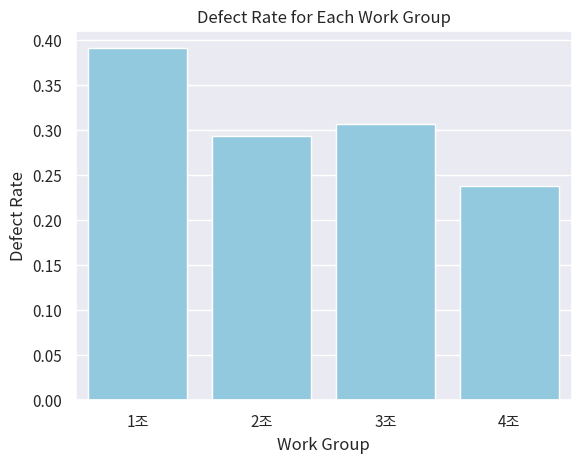

In [54]:
grouped_data = df.groupby(['work_group', 'scale'])['scale'].count().reset_index(name='count')

# Pivot the data to get 'scale' as columns and calculate the total count for each 'work_group'
pivot_data = grouped_data.pivot(index='work_group', columns='scale', values='count').reset_index()

# Calculate the defect rate (불량률) for each work group
pivot_data['defect_rate'] = pivot_data['불량'] / (pivot_data['양품'] + pivot_data['불량'])

# Create a bar plot to visualize the defect rate for each work group
sns.barplot(x='work_group', y='defect_rate', data=pivot_data, color='skyblue')

# Add labels and title
plt.xlabel('Work Group')
plt.ylabel('Defect Rate')
plt.title('Defect Rate for Each Work Group')

# Show the plot
plt.show()

> 앞서 봤던 작업조별 불량률 차이를 볼 때, 1조가 가장 높고, 그 다음으로 3,2조가 높다는 사실로 미루어보면 수요일에 불량률이 특히 높았던 이유를 이해할 수 있다.
- 따라서 불량률은 date보다는 작업조와 규격 국가에 따라 더 영향을 많이 받았다고 볼 수 있다.
- rolling_date는 드랍하기로 한다.

# 모델링

In [55]:
# 문자열과 연속형 변수 분리
col_cat = ['spec_country','steel_kind','fur_no','hsb','fur_input_row',
           'rolling_method','work_group']

col_num = ['pt_thick', 'pt_width', 'pt_length','fur_heat_temp', 'fur_heat_time',
           'fur_soak_time', 'fur_total_time', 'fur_ex_temp','rolling_temp', 'descaling_count']

col_date = ['rolling_date']
        
     

In [56]:
import copy
df_ = copy.deepcopy(df)

In [57]:
df = df_[[ 'rolling_date', 'scale', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time',
       'fur_soak_time', 'fur_total_time', 'fur_ex_temp', 'rolling_method',
       'rolling_temp', 'descaling_count', 'work_group']]

In [58]:
df['scale'].value_counts()

양품    684
불량    310
Name: scale, dtype: int64

In [59]:
df['scale'].replace('양품',0, inplace=True)
df['scale'].replace('불량',1, inplace=True)

In [60]:
df['scale'].value_counts()

0    684
1    310
Name: scale, dtype: int64

In [61]:
df_x = df.drop('scale', axis=1)
df_y = df['scale']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, stratify=df_y, random_state=6659)

In [63]:
x_train_res = pd.get_dummies(x_train[col_cat], drop_first=True)
x_test_res = pd.get_dummies(x_test[col_cat], drop_first=True)

In [64]:
x_train = pd.concat([x_train[col_num], x_train_res], axis=1)
x_test = pd.concat([x_test[col_num], x_test_res], axis=1)
x_train_s = pd.concat([x_train[col_num], x_train_res], axis=1)
x_test_s = pd.concat([x_test[col_num], x_test_res], axis=1)

In [65]:
scaler = StandardScaler()
x_train_s[col_num] = scaler.fit_transform(x_train[col_num])
x_test_s[col_num] = scaler.transform(x_test[col_num])

In [66]:
x_train_s.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,...,spec_country_한국,steel_kind_T,fur_no_2호기,fur_no_3호기,hsb_적용,fur_input_row_2열,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조
736,-0.365710,-0.669475,0.463510,0.837927,-0.416223,-0.973362,-0.943710,0.721596,1.318747,0.893964,...,0,0,1,0,1,0,0,0,1,0
988,-0.475573,0.979742,0.260725,0.837927,-0.757931,-0.006080,0.020108,0.545834,0.380902,0.893964,...,0,0,0,0,1,0,0,0,0,1
254,0.183606,-1.081780,-0.456268,-0.269953,-0.795898,0.961202,0.421699,0.252896,1.430017,-0.363738,...,0,0,1,0,1,0,0,1,0,0
640,-0.750231,1.598198,1.296381,-1.233326,-1.137606,1.164840,0.234290,-0.860267,-1.288145,0.893964,...,1,0,0,0,1,1,0,0,1,0
895,-0.420642,-0.669475,-0.202786,0.693421,-1.061671,-0.769723,-0.515346,0.780184,1.334643,0.265113,...,0,0,1,0,1,1,0,0,1,0


In [67]:
x_train.head()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,...,spec_country_한국,steel_kind_T,fur_no_2호기,fur_no_3호기,hsb_적용,fur_input_row_2열,rolling_method_TMCP(온도제어),work_group_2조,work_group_3조,work_group_4조
736,20,2500,43400,1174,75,52,203,1163,1024,10,...,0,0,1,0,1,0,0,0,1,0
988,18,3300,40600,1174,66,71,239,1160,965,10,...,0,0,0,0,1,0,0,0,0,1
254,30,2300,30700,1151,65,90,254,1155,1031,8,...,0,0,1,0,1,0,0,1,0,0
640,13,3600,54900,1131,56,94,247,1136,860,10,...,1,0,0,0,1,1,0,0,1,0
895,19,2500,34200,1171,58,56,219,1164,1025,9,...,0,0,1,0,1,1,0,0,1,0


In [68]:
x_train_s.isna().sum().sum()

0

In [69]:
x_train.isna().sum().sum()

0

> 변수명
- x_train, x_test: 원본 수치형 변수 + 원핫인코딩 범주형 변수 + 날짜
- x_train_s, x_test_s: 스케일링(Standard) 수치형 변수 + 원핫인코딩 범주형 변수 + 날짜

# 의사결정나무

In [ ]:
# default model
tree_final=DecisionTreeClassifier(random_state=6659)
tree_final.fit(x_train,y_train)

print("Score on training set: {:.3f}".format(tree_final.score(x_train,y_train)))
print("Score on testing set: {:.3f}".format(tree_final.score(x_test,y_test)))


Score on training set: 1.000
Score on testing set: 0.970


#### 변수 중요도 : 의사결정나무

In [ ]:
df_importance=pd.DataFrame()
df_importance["Feature"]= x_train.columns
df_importance["importance"]= tree_final.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.529
19,hsb_적용,0.154
9,descaling_count,0.149
7,fur_ex_temp,0.142
1,pt_width,0.013
5,fur_soak_time,0.006
20,fur_input_row_2열,0.003
13,spec_country_일본,0.002
2,pt_length,0.001
0,pt_thick,0.000


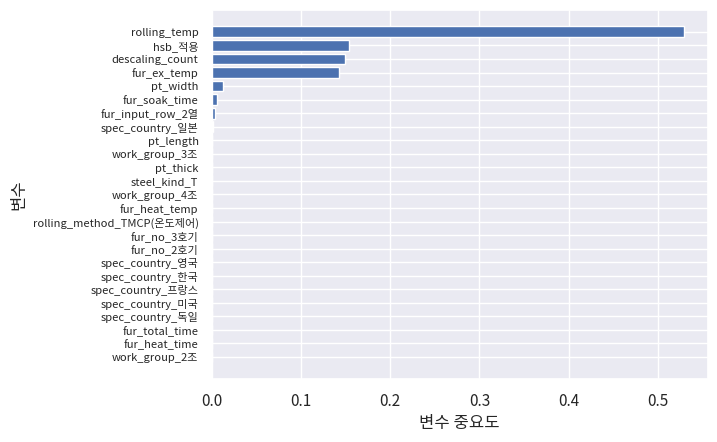

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True) 
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize=8)
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

# RandomForest

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [ ]:
# default model
rf_uncustomized = RandomForestRegressor(random_state=6659)
rf_uncustomized.fit(x_train, y_train)

print("Score on training set:{:.3f}".format(rf_uncustomized.score(x_train, y_train)))
print("Score on test set:{:.3f}".format(rf_uncustomized.score(x_test, y_test)))

Score on training set:0.995
Score on test set:0.927


In [ ]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 6659,
 'verbose': 0,
 'warm_start': False}

#### 최적 파라미터 : GridSearch

In [ ]:
estimator= RandomForestRegressor(random_state=6659)
para_depth=[depth for depth in range(1,11)]
para_leaf=[n_leaf for n_leaf in range(4,21)]
para_split=[n_split*2 for n_split in range(3,21)]

param_grid={"max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf=GridSearchCV(estimator,param_grid,scoring="r2", n_jobs= -1)
grid_rf.fit(x_train, y_train)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=6,
                      random_state=6659)

best parameter:
{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 6}

best score:
0.931


## 최종모델 : RandomForest

In [ ]:
best_rf = grid_rf.best_estimator_ # 최적의 파라미터로 모델 생성
best_rf.fit(x_train, y_train)
print('Training Score: ',best_rf.score(x_train,y_train))
print('Test Score: ', best_rf.score(x_test,y_test))
test_pred = best_rf.predict(x_test)

Training Score:  0.9647251727199977
Test Score:  0.9072447754563356


#### 변수중요도 : RandomForest

In [ ]:
v_feature_name= x_train.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= best_rf.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.548
19,hsb_적용,0.166
7,fur_ex_temp,0.145
9,descaling_count,0.071
0,pt_thick,0.048
6,fur_total_time,0.006
2,pt_length,0.003
5,fur_soak_time,0.003
1,pt_width,0.003
13,spec_country_일본,0.003


Text(0, 0.5, '설명변수')

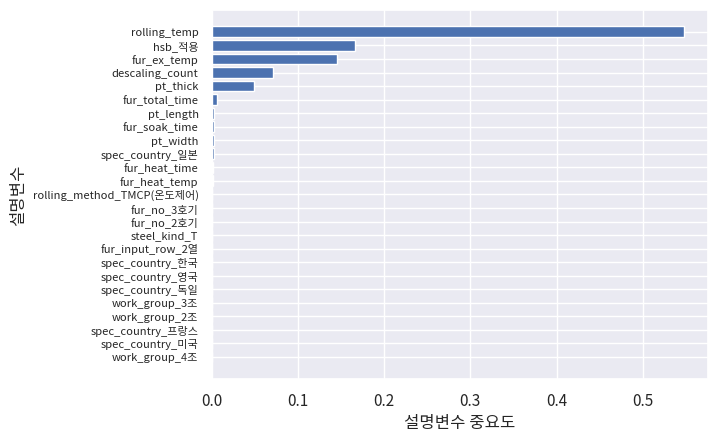

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize=8)
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# Gradient Boosting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# default model
gb_uncustomized = GradientBoostingRegressor(random_state=6659)
gb_uncustomized.fit(x_train, y_train)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(x_train, y_train)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(x_test, y_test)))

Score on training set:0.988
Score on test set:0.936


In [ ]:
gb_uncustomized.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 6659,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### 최적 파라미터 : learning rate

In [ ]:
train_score=[]; test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gb= GradientBoostingRegressor(learning_rate=v_learning_rate)
    gb.fit(x_train, y_train)
    train_score.append(gb.score(x_train, y_train))
    test_score.append(gb.score(x_test,y_test))

In [ ]:
df_score_lr= pd.DataFrame()
df_score_lr["LearningRate"]=para_lr
df_score_lr["TrainScore"]= train_score
df_score_lr["TestScore"]=test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.988,0.940
1,0.2,0.999,0.961
2,0.3,0.999,0.943
3,0.4,1.000,0.961
4,0.5,1.000,0.962
5,0.6,1.000,0.956
6,0.7,1.000,0.953
7,0.8,1.000,0.960
8,0.9,1.000,0.888


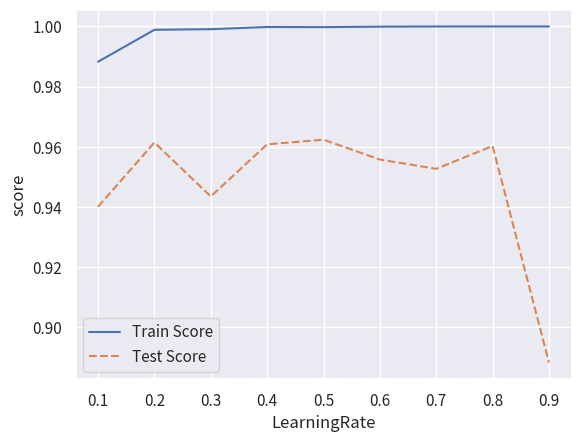

In [ ]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.ylabel("score"); plt.xlabel("LearningRate")
plt.show()

#### 최적 파라미터 : ntree

In [ ]:
train_score=[]; test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb= GradientBoostingRegressor(n_estimators=v_n_estimators,learning_rate=0.2, random_state=6659)
    gb.fit(x_train, y_train)
    train_score.append(gb.score(x_train, y_train))
    test_score.append(gb.score(x_test,y_test))

In [ ]:
df_score_n= pd.DataFrame()
df_score_n["n_estimators"]=para_n_tree
df_score_n["TrainScore"]= train_score
df_score_n["TestScore"]=test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.870,0.875
1,20,0.961,0.940
2,30,0.981,0.949
3,40,0.989,0.951
4,50,0.994,0.955
5,60,0.995,0.956
6,70,0.997,0.956
7,80,0.998,0.958
8,90,0.999,0.960
9,100,0.999,0.961


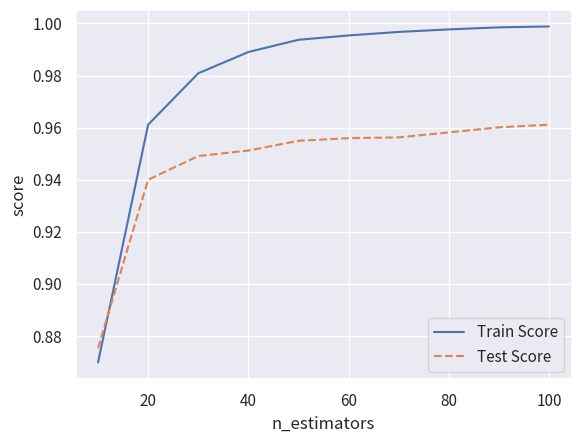

In [ ]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

#### 최적 파라미터 : max depth

In [ ]:
train_score=[]; test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb= GradientBoostingRegressor(n_estimators=100,random_state=6659, learning_rate=0.2, max_depth=v_max_depth)
    gb.fit(x_train, y_train)
    train_score.append(gb.score(x_train, y_train))
    test_score.append(gb.score(x_test, y_test))

In [ ]:
df_score_depth= pd.DataFrame()
df_score_depth["depth"]=para_depth
df_score_depth["TrainScore"]= train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,depth,TrainScore,TestScore
0,1,0.883,0.853
1,2,0.975,0.923
2,3,0.999,0.961
3,4,1.000,0.957
4,5,1.000,0.943
5,6,1.000,0.956
6,7,1.000,0.964
7,8,1.000,0.944
8,9,1.000,0.942
9,10,1.000,0.909


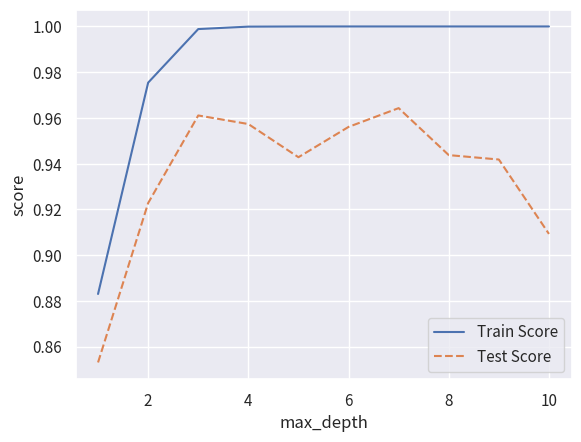

In [ ]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()
plt.ylabel("score"); plt.xlabel("max_depth")
plt.show()

#### 최적 파라미터 : min_samples_split

In [ ]:
train_score=[]; test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    gb= GradientBoostingRegressor(n_estimators=100,random_state=6659, learning_rate=0.2, max_depth=7, min_samples_split=v_min_samples_split)
    gb.fit(x_train, y_train)
    train_score.append(gb.score(x_train, y_train))
    test_score.append(gb.score(x_test,y_test))

In [ ]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleSplit"] =para_split
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleSplit,TrainScore,TestScore
0,4,1.0,0.968
1,6,1.0,0.967
2,8,1.0,0.956
3,10,1.0,0.961
4,12,1.0,0.959
5,14,1.0,0.959
6,16,1.0,0.959
7,18,1.0,0.960
8,20,1.0,0.959
9,22,1.0,0.960


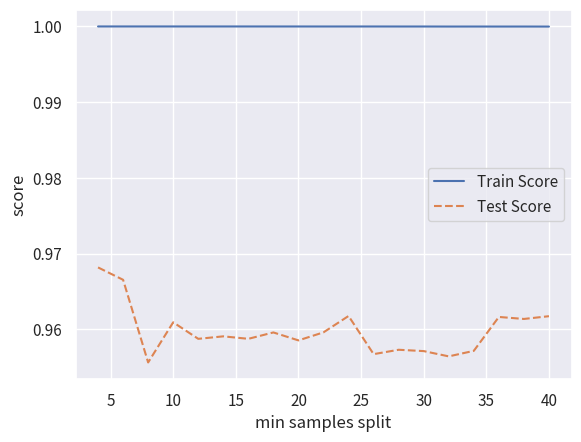

In [ ]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
plt.show()

#### 최적 파라미터 : min_samples_leaf

In [ ]:
train_score=[]; test_score=[]
para_leaf=[n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    gb= GradientBoostingRegressor(n_estimators=100,random_state=6659, learning_rate=0.2, max_depth=7, min_samples_split=10, min_samples_leaf=v_min_samples_leaf)
    gb.fit(x_train, y_train)
    train_score.append(gb.score(x_train, y_train))
    test_score.append(gb.score(x_test,y_test))

In [ ]:
df_score_leaf= pd.DataFrame()
df_score_leaf["MinSampleLeaf"] =para_leaf
df_score_leaf["TrainScore"]= train_score
df_score_leaf["TestScore"]=test_score
df_score_leaf.round(3)

,MinSampleLeaf,TrainScore,TestScore
0,1,1.000,0.961
1,2,1.000,0.951
2,3,1.000,0.973
3,4,0.999,0.924
4,5,0.999,0.930
5,6,0.999,0.933
6,7,0.998,0.929
7,8,0.997,0.924
8,9,0.997,0.922
9,10,0.997,0.925


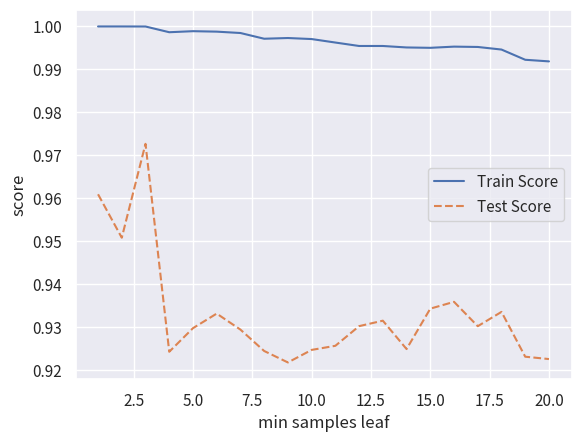

In [ ]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

## 최종 모델 : Gradient Boosting

In [ ]:
gb_final= GradientBoostingRegressor(n_estimators=100,random_state=6659, learning_rate=0.2, max_depth=7, min_samples_split=10, min_samples_leaf=3)
gb_final.fit(x_train, y_train)

print("Score on training set:{:.3f}".format(gb_final.score(x_train, y_train)))
print("Score on test set:{:.3f}".format(gb_final.score(x_test, y_test)))

Score on training set:1.000
Score on test set:0.973


In [ ]:
test_pred=gb_final.predict(x_test)
pd.DataFrame({'실제값':y_test,'예측값':test_pred}).reset_index(drop=True)

,실제값,예측값
0,0,0.000937
1,0,0.094162
2,0,0.002412
3,0,0.000297
4,0,0.001517
...,...,...
294,0,0.006940
295,1,0.994790
296,1,0.998309
297,0,0.000312


#### 변수 중요도 : Gradient Boosting

In [ ]:
v_feature_name= x_train.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= gb_final.feature_importances_
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
8,rolling_temp,0.527
19,hsb_적용,0.154
7,fur_ex_temp,0.144
9,descaling_count,0.090
0,pt_thick,0.072
1,pt_width,0.008
2,pt_length,0.003
6,fur_total_time,0.001
13,spec_country_일본,0.001
5,fur_soak_time,0.000


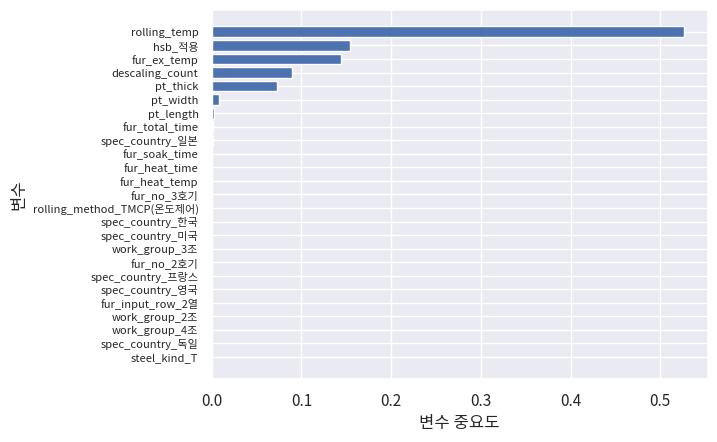

In [ ]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"], fontsize=8)
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

## SVM

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,roc_curve,auc,precision_score,recall_score
#confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy import stats

In [ ]:
# default model
svm_uncustomized= SVC(random_state=6659)
svm_uncustomized.fit(x_train_s, y_train)
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(x_train_s, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(x_test_s, y_test)))

Accuracy on training set: 0.906
Accuracy on test set: 0.860


In [ ]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 6659, True, 0.001, False])


#### 최적 파라미터 : C

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_c=[0.1*c for c in range(1,20)]

for v_C in para_c :
    svm= SVC(C=v_C,random_state=6659)
    svm.fit(x_train_s, y_train)
    train_accuracy.append(svm.score(x_train_s, y_train))
    test_accuracy.append(svm.score(x_test_s, y_test))

In [ ]:
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainScore"]= train_accuracy
df_accuracy_c["TestScore"]=test_accuracy
df_accuracy_c.round(3)

,C,TrainScore,TestScore
0,0.1,0.826,0.826
1,0.2,0.843,0.823
2,0.3,0.852,0.833
3,0.4,0.863,0.843
4,0.5,0.871,0.853
5,0.6,0.881,0.863
6,0.7,0.886,0.860
7,0.8,0.892,0.860
8,0.9,0.899,0.856
9,1.0,0.906,0.860


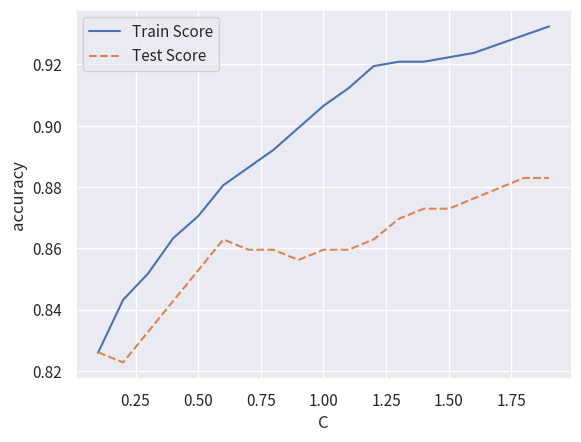

In [ ]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : gamma

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_gamma=[0.01*gamma for gamma in range(1,20)]

for v_gamma in para_gamma:
    svm= SVC(gamma=v_gamma,random_state=6659)
    svm.fit(x_train_s, y_train)
    train_accuracy.append(svm.score(x_train_s, y_train))
    test_accuracy.append(svm.score(x_test_s, y_test))

In [ ]:
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainScore"]= train_accuracy
df_accuracy_gamma["TestScore"]=test_accuracy
df_accuracy_gamma.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.852,0.833
1,0.02,0.871,0.839
2,0.03,0.881,0.853
3,0.04,0.885,0.856
4,0.05,0.896,0.853
5,0.06,0.898,0.853
6,0.07,0.902,0.853
7,0.08,0.911,0.863
8,0.09,0.919,0.873
9,0.10,0.922,0.880


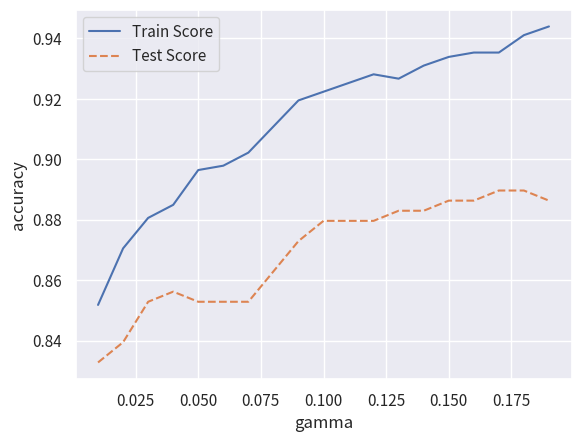

In [ ]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

## 최종모델 : SVM

In [ ]:
svc_final= SVC(gamma=0.12,C=0.6,random_state=6659)
svc_final.fit(x_train_s, y_train)
y_pred=svc_final.predict(x_test_s)


In [ ]:
print("Train Accurary: {:.3f}".format(svc_final.score(x_train_s, y_train)))
print("Test Accuracy: {:.3f}".format(svc_final.score(x_test_s, y_test)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred, digits=3))

Train Accurary: 0.902
Test Accuracy: 0.873
Test Confusion Matrix:
[[195  11]
 [ 27  66]]
              precision    recall  f1-score   support

           0      0.878     0.947     0.911       206
           1      0.857     0.710     0.776        93

    accuracy                          0.873       299
   macro avg      0.868     0.828     0.844       299
weighted avg      0.872     0.873     0.869       299



### 최적 파라미터 : GridSearch

In [ ]:
estimator=SVC(random_state=6659)
param_grid={"C":para_c,"gamma":para_gamma}

grid_svc=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_svc.fit(x_train_s, y_train)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=1.8, gamma=0.08, random_state=6659)

best parameter:
{'C': 1.8, 'gamma': 0.08}

best score:
0.872


## 최종모델 : SVM 

In [ ]:
svc_final= SVC(gamma=0.12,C=0.6,random_state=6659)
svc_final.fit(x_train_s, y_train)
y_pred=svc_final.predict(x_test_s)


In [ ]:
print("Train Accurary: {:.3f}".format(svc_final.score(x_train_s, y_train)))
print("Test Accuracy: {:.3f}".format(svc_final.score(x_test_s, y_test)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(y_test , y_pred)))
print(classification_report(y_test, y_pred, digits=3))

Train Accurary: 0.902
Test Accuracy: 0.873
Test Confusion Matrix:
[[195  11]
 [ 27  66]]
              precision    recall  f1-score   support

           0      0.878     0.947     0.911       206
           1      0.857     0.710     0.776        93

    accuracy                          0.873       299
   macro avg      0.868     0.828     0.844       299
weighted avg      0.872     0.873     0.869       299



# 인공신경망

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# default model
nn_uncust=MLPClassifier(random_state=6659)
nn_uncust.fit(x_train_s, y_train)
print("Accurary on training: {:.3f}".format(nn_uncust.score(x_train_s, y_train)))
print("Accuracy on test set: {:.3f}".format(nn_uncust.score(x_test_s, y_test)))

Accurary on training: 0.958
Accuracy on test set: 0.880


In [ ]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 6659, True, 'adam', 0.0001, 0.1, False, False])


#### 최적 파라미터 : hidden

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_hidden=[5*hidden for hidden in range(1,21)]

print(para_hidden)
for v_hidden in para_hidden:
    nn= MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=6659)
    nn.fit(x_train_s, y_train)
    train_accuracy.append(nn.score(x_train_s, y_train))
    test_accuracy.append(nn.score(x_test_s, y_test))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [ ]:
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainScore"]= train_accuracy
df_accuracy_hidden["TestScore"]=test_accuracy
df_accuracy_hidden.round(3)


,HiddenLayer,TrainScore,TestScore
0,5,0.868,0.826
1,10,0.934,0.876
2,15,0.929,0.870
3,20,0.953,0.856
4,25,0.971,0.893
5,30,0.973,0.886
6,35,0.996,0.893
7,40,0.991,0.896
8,45,0.994,0.890
9,50,1.000,0.890


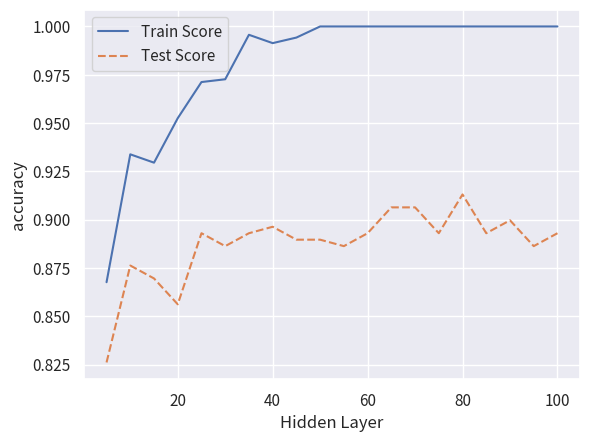

In [ ]:
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Hidden Layer"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : function

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_function=["logistic","tanh","relu"]

for v_function in para_function:
    nn= MLPClassifier(activation=v_function,hidden_layer_sizes=(40,40),random_state=6659)
    nn.fit(x_train_s, y_train)
    train_accuracy.append(nn.score(x_train_s, y_train))
    test_accuracy.append(nn.score(x_test_s, y_test))

In [ ]:
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainScore"]= train_accuracy
df_accuracy_function["TestScore"]=test_accuracy
df_accuracy_function.round(3)


,ActivationFunction,TrainScore,TestScore
0,logistic,0.849,0.833
1,tanh,0.963,0.883
2,relu,0.991,0.896


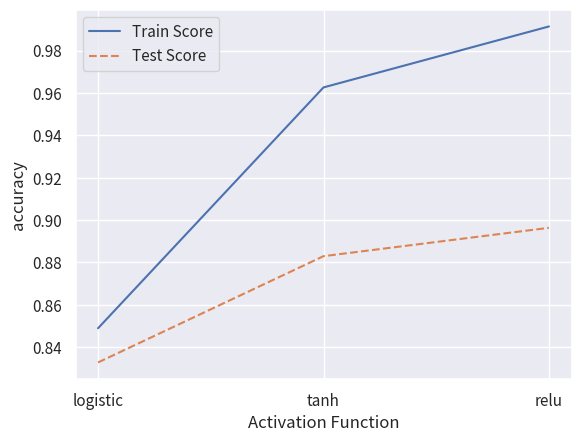

In [ ]:
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : Solver

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_solver=["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn= MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=(40,40),random_state=6659)
    nn.fit(x_train_s, y_train)
    train_accuracy.append(nn.score(x_train_s, y_train))
    test_accuracy.append(nn.score(x_test_s, y_test))

In [ ]:
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainScore"]= train_accuracy
df_accuracy_solver["TestScore"]=test_accuracy
df_accuracy_solver.round(3)


,Solver,TrainScore,TestScore
0,lbfgs,1.000,0.903
1,sgd,0.839,0.793
2,adam,0.991,0.896


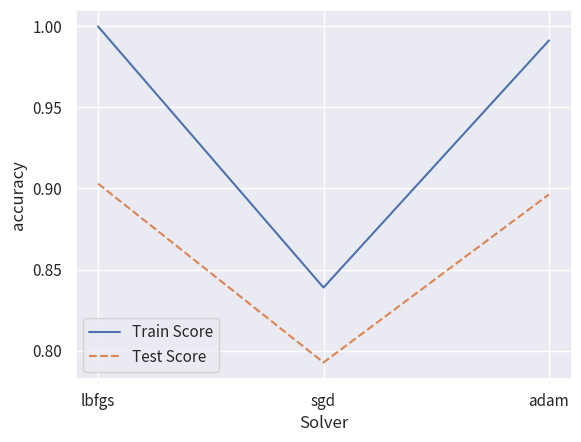

In [ ]:
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Solver"); plt.ylabel("accuracy")
plt.legend()

#### 최적 파라미터 : batch size

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_batch=[5*batch for batch in range(1,20)]

print(para_batch)
for v_batch in para_batch:
    nn= MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=(40,40),random_state=6659)
    nn.fit(x_train_s, y_train)
    train_accuracy.append(nn.score(x_train_s, y_train))
    test_accuracy.append(nn.score(x_test_s, y_test))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [ ]:
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini batch"]=para_batch
df_accuracy_batch["TrainScore"]= train_accuracy
df_accuracy_batch["TestScore"]=test_accuracy
df_accuracy_batch.round(3)


,Mini batch,TrainScore,TestScore
0,5,1.0,0.896
1,10,1.0,0.896
2,15,1.0,0.900
3,20,1.0,0.893
4,25,1.0,0.900
5,30,1.0,0.893
6,35,1.0,0.890
7,40,1.0,0.900
8,45,1.0,0.890
9,50,1.0,0.900


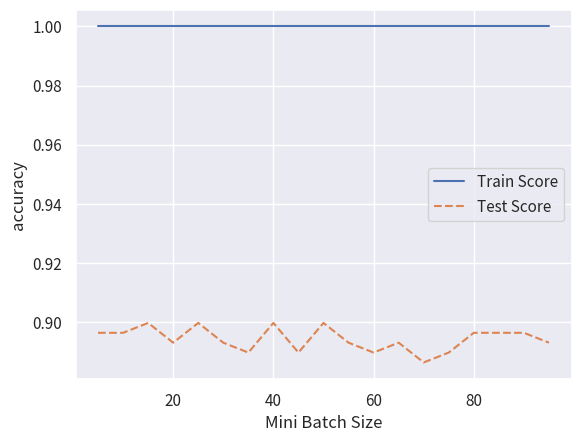

In [ ]:
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuracy")
plt.legend()

Mini Batch에 따라 정확도에 큰 변화가 없어서 최종모델에 지정하지 않았습니다.

## 최종모델 : 인공신경망

In [ ]:
nn_final= MLPClassifier(hidden_layer_sizes=(40,40),activation="relu",solver="adam",random_state=6659)
nn_final.fit(x_train_s, y_train)
y_pred=nn_final.predict(x_test_s)

In [ ]:
print("Train Accurary: {:.3f}".format(nn_final.score(x_train_s, y_train)))
print("Test Accuracy: {:.3f}".format(nn_final.score(x_test_s, y_test)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(y_test , y_pred)))
print(classification_report(y_test, y_pred, digits=3))

Train Accurary: 0.991
Test Accuracy: 0.896
Test Confusion Matrix:
[[194  12]
 [ 19  74]]
              precision    recall  f1-score   support

           0      0.911     0.942     0.926       206
           1      0.860     0.796     0.827        93

    accuracy                          0.896       299
   macro avg      0.886     0.869     0.876       299
weighted avg      0.895     0.896     0.895       299



# KNN

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# default model
knn_uncust=KNeighborsClassifier()
knn_uncust.fit(x_train_s, y_train)
print("Accurary on training: {:.3f}".format(knn_uncust.score(x_train_s, y_train)))
print("Accuracy on test set: {:.3f}".format(knn_uncust.score(x_test_s, y_test)))

Accurary on training: 0.873
Accuracy on test set: 0.849


In [ ]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


#### 최적파라미터 : 이웃 수

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(x_train_s, y_train)
    train_accuracy.append(knn.score(x_train_s, y_train))
    test_accuracy.append(knn.score(x_test_s, y_test))

In [ ]:
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainScore"]= train_accuracy
df_accuracy_neighbors["TestScore"]=test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,1,1.000,0.813
1,2,0.888,0.836
2,3,0.904,0.849
3,4,0.872,0.843
4,5,0.873,0.849
5,6,0.866,0.860
6,7,0.869,0.843
7,8,0.856,0.833
8,9,0.849,0.843
9,10,0.843,0.836


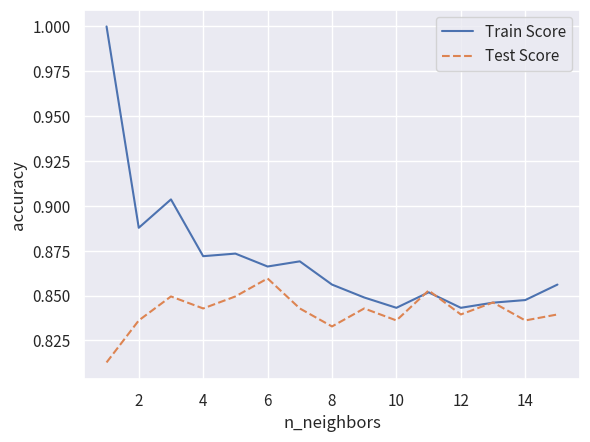

In [ ]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

* 이웃수는 11로 결정

#### 최적 파라미터 : uniform vs distance

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,21)]*2
para_weights=(["uniform"])*20+(["distance"]*20)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, weights= v_weights)
    knn.fit(x_train_s, y_train)
    train_accuracy.append(knn.score(x_train_s, y_train))
    test_accuracy.append(knn.score(x_test_s, y_test))

In [ ]:
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]= train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.813
1,2,uniform,0.888,0.836
2,3,uniform,0.904,0.849
3,4,uniform,0.872,0.843
4,5,uniform,0.873,0.849
5,6,uniform,0.866,0.860
6,7,uniform,0.869,0.843
7,8,uniform,0.856,0.833
8,9,uniform,0.849,0.843
9,10,uniform,0.843,0.836


In [ ]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.812709  0.812709
2                   1.0  0.887770     0.812709  0.836120
3                   1.0  0.903597     0.846154  0.849498
4                   1.0  0.871942     0.849498  0.842809
5                   1.0  0.873381     0.862876  0.849498
6                   1.0  0.866187     0.866221  0.859532
7                   1.0  0.869065     0.856187  0.842809
8                   1.0  0.856115     0.849498  0.832776
9                   1.0  0.848921     0.849498  0.842809
10                  1.0  0.843165     0.849498  0.836120
11                  1.0  0.851799     0.859532  0.852843
12                  1.0  0.843165     0.849498  0.839465
13                  1.0  0.846043     0.856187  0.846154
14                  1.0  0.847482     0.856187  0.836120
15                  1.0  0.856115     0.852843  0.839465
16                  1.0  0.850360     0.846154  0.836120
17                  1.0  0.848921     0.846154  0.836120
18                  1.0  0.844604     0.846154  0.829431
19                  1.0  0.850360     0.839465  0.829431
20                  1.0  0.848921     0.839465  0.826087

In [ ]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.812709,0.812709
2,1.0,0.887770,0.812709,0.836120
3,1.0,0.903597,0.846154,0.849498
4,1.0,0.871942,0.849498,0.842809
5,1.0,0.873381,0.862876,0.849498


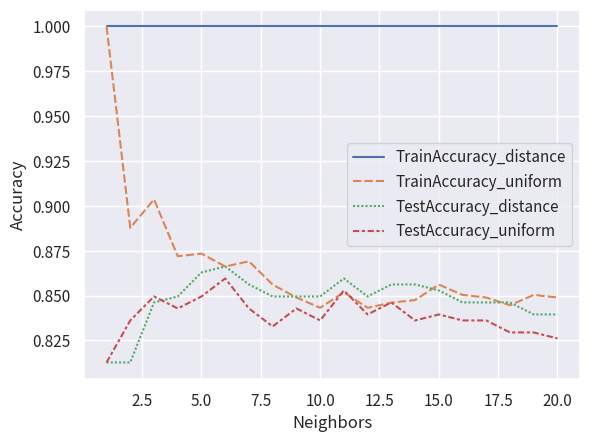

In [ ]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

* distance계산방식은 모델의 정확도가 1이 나와서 과대적합이 발생하기 때문에 uniform을 선택한다.

#### 최적 파라미터 : euclidean vs manhattan

In [ ]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,21)]*2
para_metric=["euclidean"]*20+["manhattan"]*20

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(x_train_s, y_train)
    train_accuracy.append(knn.score(x_train_s, y_train))
    test_accuracy.append(knn.score(x_test_s, y_test))

In [ ]:
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]= train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.813
1,2,euclidean,0.888,0.836
2,3,euclidean,0.904,0.849
3,4,euclidean,0.872,0.843
4,5,euclidean,0.873,0.849
5,6,euclidean,0.866,0.860
6,7,euclidean,0.869,0.843
7,8,euclidean,0.856,0.833
8,9,euclidean,0.849,0.843
9,10,euclidean,0.843,0.836


In [ ]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot.head()

TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
1              1.000000  1.000000     0.812709  0.832776
2              0.887770  0.899281     0.836120  0.842809
3              0.903597  0.906475     0.849498  0.856187
4              0.871942  0.877698     0.842809  0.849498
5              0.873381  0.886331     0.849498  0.849498

In [ ]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.812709,0.832776
2,0.887770,0.899281,0.836120,0.842809
3,0.903597,0.906475,0.849498,0.856187
4,0.871942,0.877698,0.842809,0.849498
5,0.873381,0.886331,0.849498,0.849498


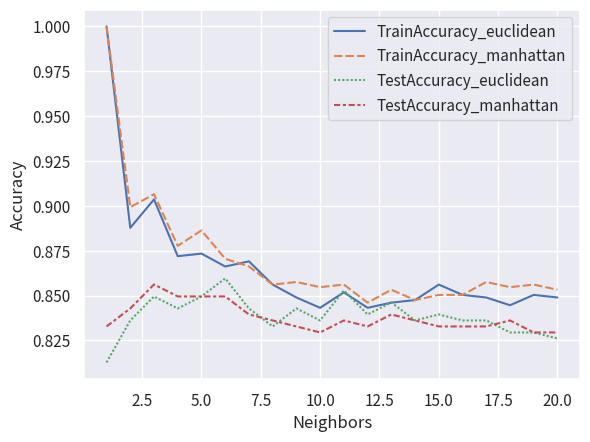

In [ ]:
sns.lineplot(data=df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

* euclidean이 미세하게 더 정확도가 좋음.

## 최종모델 : KNN

In [ ]:
knn_model= KNeighborsClassifier(n_neighbors=6, weights="uniform", metric="euclidean")
knn_model.fit(x_train_s, y_train)
y_pred=knn_model.predict(x_test_s)

print('train data accuracy:{0:.3f}'.format(knn_model.score(x_train_s, y_train)))
print('test data accuracy:{0:.3f}\n'.format(knn_model.score(x_test_s, y_test)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))
print(classification_report(y_test, y_pred, digits=3))

train data accuracy:0.866
test data accuracy:0.860

Confusion matrix:
[[197   9]
 [ 33  60]]
              precision    recall  f1-score   support

           0      0.857     0.956     0.904       206
           1      0.870     0.645     0.741        93

    accuracy                          0.860       299
   macro avg      0.863     0.801     0.822       299
weighted avg      0.861     0.860     0.853       299



# 로지스틱 회귀분석

In [70]:
df_com_train = pd.concat([x_train_s, y_train], axis=1)
df_com_test = pd.concat([x_test_s, y_test], axis=1)

In [71]:
new_column_names = {'rolling_method_TMCP(온도제어)': 'rolling_method_TMCP'}
df_com_train.rename(columns=new_column_names, inplace=True)
df_com_test.rename(columns=new_column_names, inplace=True)

In [72]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+fur_soak_time+fur_total_time+fur_ex_temp+rolling_temp+descaling_count+spec_country_독일+spec_country_미국+spec_country_영국+spec_country_일본+spec_country_프랑스+spec_country_한국+steel_kind_T+fur_no_2호기+fur_no_3호기+hsb_적용+fur_input_row_2열+rolling_method_TMCP+work_group_2조+work_group_3조+work_group_4조""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.284600
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      669
Method:                           MLE   Df Model:                           25
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5416
Time:                        22:58:59   Log-Likelihood:                -197.80
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 4.230e-83
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              70.7281   2.42e+05      0.000      1.000   -4.75e+05    4.75e+05
pt_thick               -0.9461      0.

In [73]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [74]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.872

Confusion Matrix:
[[439  39]
 [ 50 167]] 

              precision    recall  f1-score   support

           0      0.898     0.918     0.908       478
           1      0.811     0.770     0.790       217

    accuracy                          0.872       695
   macro avg      0.854     0.844     0.849       695
weighted avg      0.871     0.872     0.871       695

Test 예측/분류 결과
Accuracy:0.853

Confusion Matrix:
[[187  19]
 [ 25  68]] 

              precision    recall  f1-score   support

           0      0.882     0.908     0.895       206
           1      0.782     0.731     0.756        93

    accuracy                          0.853       299
   macro avg      0.832     0.819     0.825       299
weighted avg      0.851     0.853     0.851       299



#### fur_soak_time 제거 후 모델

In [75]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+fur_total_time+fur_ex_temp+rolling_temp+descaling_count+spec_country_독일+spec_country_미국+spec_country_영국+spec_country_일본+spec_country_프랑스+spec_country_한국+steel_kind_T+fur_no_2호기+fur_no_3호기+hsb_적용+fur_input_row_2열+rolling_method_TMCP+work_group_2조+work_group_3조+work_group_4조""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.284613
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                           24
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5416
Time:                        22:58:59   Log-Likelihood:                -197.81
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 9.548e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7108   2.11e+04      0.003      0.998   -4.13e+04    4.14e+04
pt_thick               -0.9437      0.

In [76]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [77]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.869

Confusion Matrix:
[[439  39]
 [ 52 165]] 

              precision    recall  f1-score   support

           0      0.894     0.918     0.906       478
           1      0.809     0.760     0.784       217

    accuracy                          0.869       695
   macro avg      0.851     0.839     0.845       695
weighted avg      0.867     0.869     0.868       695

Test 예측/분류 결과
Accuracy:0.853

Confusion Matrix:
[[187  19]
 [ 25  68]] 

              precision    recall  f1-score   support

           0      0.882     0.908     0.895       206
           1      0.782     0.731     0.756        93

    accuracy                          0.853       299
   macro avg      0.832     0.819     0.825       299
weighted avg      0.851     0.853     0.851       299



#### fur_total_time 제거 후 모델

In [78]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+fur_ex_temp+rolling_temp+descaling_count+spec_country_독일+spec_country_미국+spec_country_영국+spec_country_일본+spec_country_프랑스+spec_country_한국+steel_kind_T+fur_no_2호기+fur_no_3호기+hsb_적용+fur_input_row_2열+rolling_method_TMCP+work_group_2조+work_group_3조+work_group_4조""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.284960
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      671
Method:                           MLE   Df Model:                           23
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5410
Time:                        22:59:00   Log-Likelihood:                -198.05
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 2.631e-84
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              62.8674   1.32e+05      0.000      1.000   -2.58e+05    2.58e+05
pt_thick               -0.9209      0.

In [79]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [80]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.866

Confusion Matrix:
[[438  40]
 [ 53 164]] 

              precision    recall  f1-score   support

           0      0.892     0.916     0.904       478
           1      0.804     0.756     0.779       217

    accuracy                          0.866       695
   macro avg      0.848     0.836     0.842       695
weighted avg      0.865     0.866     0.865       695

Test 예측/분류 결과
Accuracy:0.863

Confusion Matrix:
[[188  18]
 [ 23  70]] 

              precision    recall  f1-score   support

           0      0.891     0.913     0.902       206
           1      0.795     0.753     0.773        93

    accuracy                          0.863       299
   macro avg      0.843     0.833     0.838       299
weighted avg      0.861     0.863     0.862       299



#### fur_ex_temp 제거 후 모델

In [81]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+rolling_temp+descaling_count+steel_kind_T+fur_no_2호기+fur_no_3호기+hsb_적용+fur_input_row_2열+rolling_method_TMCP+work_group_2조+work_group_3조+work_group_4조""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.293687
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                           16
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5270
Time:                        22:59:00   Log-Likelihood:                -204.11
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 1.128e-86
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              31.8292   2.77e+05      0.000      1.000   -5.43e+05    5.43e+05
pt_thick               -0.8737      0.

In [82]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [83]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.866

Confusion Matrix:
[[440  38]
 [ 55 162]] 

              precision    recall  f1-score   support

           0      0.889     0.921     0.904       478
           1      0.810     0.747     0.777       217

    accuracy                          0.866       695
   macro avg      0.849     0.834     0.841       695
weighted avg      0.864     0.866     0.865       695

Test 예측/분류 결과
Accuracy:0.870

Confusion Matrix:
[[188  18]
 [ 21  72]] 

              precision    recall  f1-score   support

           0      0.900     0.913     0.906       206
           1      0.800     0.774     0.787        93

    accuracy                          0.870       299
   macro avg      0.850     0.843     0.846       299
weighted avg      0.869     0.870     0.869       299



#### work_group_2조, 3조, 4조 제거 후 모델

In [84]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+rolling_temp+descaling_count+steel_kind_T+fur_no_2호기+fur_no_3호기+hsb_적용+fur_input_row_2열+rolling_method_TMCP""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.295569
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5239
Time:                        22:59:01   Log-Likelihood:                -205.42
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 2.050e-88
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              17.8665    320.578      0.056      0.956    -610.455     646.188
pt_thick               -0.9421      0.

In [85]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [86]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.872

Confusion Matrix:
[[440  38]
 [ 51 166]] 

              precision    recall  f1-score   support

           0      0.896     0.921     0.908       478
           1      0.814     0.765     0.789       217

    accuracy                          0.872       695
   macro avg      0.855     0.843     0.848       695
weighted avg      0.870     0.872     0.871       695

Test 예측/분류 결과
Accuracy:0.849

Confusion Matrix:
[[185  21]
 [ 24  69]] 

              precision    recall  f1-score   support

           0      0.885     0.898     0.892       206
           1      0.767     0.742     0.754        93

    accuracy                          0.849       299
   macro avg      0.826     0.820     0.823       299
weighted avg      0.848     0.849     0.849       299



#### fur_no_2호기 제거 후 모델

In [87]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+rolling_temp+descaling_count+steel_kind_T+hsb_적용+fur_input_row_2열+rolling_method_TMCP""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.296065
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      683
Method:                           MLE   Df Model:                           11
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5231
Time:                        22:59:03   Log-Likelihood:                -205.77
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 6.961e-90
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              25.0299   1.21e+04      0.002      0.998   -2.36e+04    2.36e+04
pt_thick               -0.8982      0.

In [88]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [89]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.873

Confusion Matrix:
[[440  38]
 [ 50 167]] 

              precision    recall  f1-score   support

           0      0.898     0.921     0.909       478
           1      0.815     0.770     0.791       217

    accuracy                          0.873       695
   macro avg      0.856     0.845     0.850       695
weighted avg      0.872     0.873     0.872       695

Test 예측/분류 결과
Accuracy:0.856

Confusion Matrix:
[[187  19]
 [ 24  69]] 

              precision    recall  f1-score   support

           0      0.886     0.908     0.897       206
           1      0.784     0.742     0.762        93

    accuracy                          0.856       299
   macro avg      0.835     0.825     0.830       299
weighted avg      0.854     0.856     0.855       299



#### fur_input_row_2열 제거 후 모델

In [90]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+rolling_temp+descaling_count+steel_kind_T+hsb_적용+rolling_method_TMCP""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.296791
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      684
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5220
Time:                        22:59:04   Log-Likelihood:                -206.27
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 1.654e-90
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              27.9450   5.68e+04      0.000      1.000   -1.11e+05    1.11e+05
pt_thick               -0.8869      0.

In [91]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [92]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.866

Confusion Matrix:
[[439  39]
 [ 54 163]] 

              precision    recall  f1-score   support

           0      0.890     0.918     0.904       478
           1      0.807     0.751     0.778       217

    accuracy                          0.866       695
   macro avg      0.849     0.835     0.841       695
weighted avg      0.864     0.866     0.865       695

Test 예측/분류 결과
Accuracy:0.853

Confusion Matrix:
[[186  20]
 [ 24  69]] 

              precision    recall  f1-score   support

           0      0.886     0.903     0.894       206
           1      0.775     0.742     0.758        93

    accuracy                          0.853       299
   macro avg      0.830     0.822     0.826       299
weighted avg      0.851     0.853     0.852       299



## 최종모델 : 로지스틱 회귀분석 : rolling_method_TMCP 제거 후 모델

In [93]:
log_model=Logit.from_formula("""scale~pt_thick+pt_width+pt_length+fur_heat_temp+fur_heat_time+rolling_temp+descaling_count+steel_kind_T+hsb_적용""",df_com_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.298533
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  695
Model:                          Logit   Df Residuals:                      685
Method:                           MLE   Df Model:                            9
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.5192
Time:                        22:59:05   Log-Likelihood:                -207.48
converged:                      False   LL-Null:                       -431.51
Covariance Type:            nonrobust   LLR p-value:                 7.476e-91
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          34.1988   1.07e+06   3.19e-05      1.000    -2.1e+06     2.1e+06
pt_thick           -0.8904      0.399     -2.232  

In [94]:
y_pred_train= log_result.predict(df_com_train)
y_pred_train_class=(y_pred_train>0.5).astype(int)
y_pred_test= log_result.predict(df_com_test)
y_pred_test_class=(y_pred_test>0.5).astype(int)

In [95]:
print("Train 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_train["scale"],y_pred_train_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_train["scale"], y_pred_train_class)),"\n")
print(classification_report(df_com_train["scale"], y_pred_train_class, digits=3))

print("Test 예측/분류 결과")
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_com_test["scale"],y_pred_test_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_com_test["scale"], y_pred_test_class)),"\n")
print(classification_report(df_com_test["scale"], y_pred_test_class, digits=3))

Train 예측/분류 결과
Accuracy:0.866

Confusion Matrix:
[[439  39]
 [ 54 163]] 

              precision    recall  f1-score   support

           0      0.890     0.918     0.904       478
           1      0.807     0.751     0.778       217

    accuracy                          0.866       695
   macro avg      0.849     0.835     0.841       695
weighted avg      0.864     0.866     0.865       695

Test 예측/분류 결과
Accuracy:0.853

Confusion Matrix:
[[186  20]
 [ 24  69]] 

              precision    recall  f1-score   support

           0      0.886     0.903     0.894       206
           1      0.775     0.742     0.758        93

    accuracy                          0.853       299
   macro avg      0.830     0.822     0.826       299
weighted avg      0.851     0.853     0.852       299



In [96]:
df_com_train_x=df_com_train.drop(['scale','fur_soak_time','fur_total_time','fur_ex_temp','spec_country_독일','spec_country_미국','spec_country_영국','spec_country_일본','spec_country_프랑스','spec_country_한국','fur_no_2호기','fur_no_3호기','fur_input_row_2열','work_group_2조','work_group_3조','work_group_4조','rolling_method_TMCP'], axis=1)
df_com_train_x_const= add_constant(df_com_train_x)

#### 최종모델 : 다중공선성 

In [97]:
df_vif= pd.DataFrame()
df_vif["variable"]= df_com_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_com_train_x_const.values,i) 
               for i in range(df_com_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
9,hsb_적용,1.02
5,fur_heat_time,1.10
4,fur_heat_temp,1.40
2,pt_width,1.73
6,rolling_temp,3.17
7,descaling_count,4.21
8,steel_kind_T,6.61
3,pt_length,6.64
1,pt_thick,6.75
0,const,24.49


#### 변수중요도 : 로지스틱 회귀분석

<Axes: >

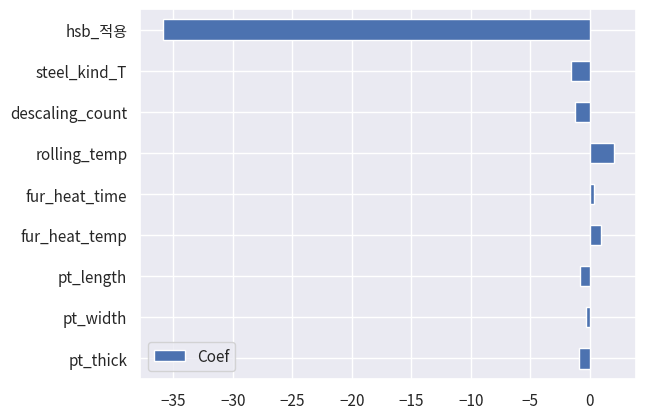

In [98]:
df_logistic_coef=pd.DataFrame({"Coef": log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y="Coef")